In [1]:
# Import Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import datetime
import warnings
from datetime import datetime, timedelta, date

#Settings
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 1200)
pd.set_option('display.width', 1200)
warnings.filterwarnings("ignore")
%matplotlib inline

#variables
color=['orange','sienna','khaki','olive','tan','maroon','r','g','yellow','darkgreen','c','teal','b','navy','m','deeppink','black','grey','brown','indigo']

**GET DATA**

In [153]:
#importing all files in data folder and read into dataframes.
dataframes = []
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file = filename.split('.')
        file = (file[0]+"_df")
        if file != "_df":
            filepath = os.path.join(dirname, filename)
#             print(filepath)
            df = pd.read_csv(filepath, sep= ",", encoding = "UTF-8")
            exec(f'{file} = df.copy()')
            print(file, df.shape)
            dataframes.append(df)
        
print("Data Imported")

players_df (28472, 23)
competitions_df (43, 10)
games_df (62247, 21)
game_events_df (568252, 7)
club_games_df (124494, 11)
player_valuations_df (424867, 9)
appearances_df (1175579, 13)
clubs_df (411, 16)
Data Imported


In [3]:
# clubs_df1 = pd.read_xlsx("/kaggle/input/player-scores/clubs.csv", sep= ",", encoding = "UTF-8")
# # clubs_df1[clubs_df1.total_market_value]
# clubs_df1.info()

**Process Data**

In [163]:
# Calculate the age of each player
players_df['date_of_birth'] = pd.to_datetime(players_df['date_of_birth'])

# print("no. of null values :", players_df["date_of_birth"].isnull().sum())
# print("percent of null values :",((players_df['date_of_birth'].isnull()).sum()/df.shape[0])*100)
# no. of null values : 42
# percent of null values : 10.218978102189782

# dropping players with no DOB

players_df = players_df[players_df['date_of_birth'].isnull() == False ]
now = datetime.now()

players_df['age'] = (now-players_df['date_of_birth']).apply(lambda x:x.days/365 )
players_df['age'] = players_df['age'].round().astype(int) 

In [164]:
#Calculating the contract remaing of each player
players_df['contract_expiration_date'] = pd.to_datetime(players_df["contract_expiration_date"])

# print("no. of null values :", players_df["contract_expiration_date"].isnull().sum())  \\ no. of null values : 10475
# print("percent of null values :",(players_df['contract_expiration_date'].isnull()).sum()/df.shape[0]) || percent of null values : 25.48661800486618

# dropping players with no contract_expiration_date

players_df = players_df[players_df['contract_expiration_date'].isnull() == False]
players_df['term_days_remaining'] = (players_df['contract_expiration_date']- now).apply(lambda x: x.days) 


In [165]:
# add year to player valuations

player_valuations_df['datetime'] = pd.to_datetime(player_valuations_df['datetime'])
player_valuations_df['year'] = player_valuations_df['datetime'].dt.year

# add year to player appearances
appearances_df['datetime']=pd.to_datetime(appearances_df['date'], format="%Y-%m-%d")
appearances_df['year']=appearances_df['datetime'].dt.year


In [166]:
#add position to player valuations
position_df = players_df.copy()
position_df = position_df[['player_id', 'sub_position', 'position']]
player_valuations_df = player_valuations_df.merge(position_df, left_on= 'player_id', right_on = 'player_id')

# add position to appearances

market_value_df = players_df.copy()
market_value_df = market_value_df[['market_value_in_eur', 'player_id']]
appearances_df1=market_value_df.merge(appearances_df, left_on='player_id', right_on='player_id')




CLUBS TOTAL MARKET VALUE

In [8]:
# print(clubs_df.columns); print(clubs_df.shape)

In [9]:
# clubs_df1['total_market_value'].isna().value_counts()
# clubs_df1['total_market_value']

In [10]:
# # plt.figure(figsize=(20,10))
# # clubs_df.plot.scatter(clubs_df['squad_size'],y=clubs_df['total_market_value'], c='red',alpha=0.2, s=clubs_df['national_team_players']*70)
# # clubs_df.plot.scatter(clubs_df['squad_size'],y=clubs_df['total_market_value'], c='crimson',alpha=0.5, marker='x')
# # plt.ylim(0,250)
# # plt.xlabel('squad size',fontsize=18); plt.ylabel('squad value',fontsize=18)
# # plt.title('Squad size and market value with number of national team players',fontsize=28)
# # plt.show()

# plt.figure(figsize=(20,10))
# # clubs_df.plot.scatter('squad_size','total_market_value', c='red',alpha=0.5, s=clubs_df['national_team_players']*70)
# # clubs_df.plot.scatter(x = 'squad_size',y = 'total_market_value', c='crimson',alpha=0.5, marker='x')
# plt.ylim(0,250)
# plt.xlabel('squad size',fontsize=18); plt.ylabel('squad value',fontsize=18)
# plt.title('Squad size and market value with number of national team players',fontsize=28)
# plt.show()

***PLAYER VALUATION DATA VISUALIZATION***

For this visualization we'll be using data for years between 2004 and 2023.
Also High value players are taken as players whose market valure is greater than 40000000

In [167]:
player_valuations_df = player_valuations_df[(player_valuations_df.year > 2004 ) & (player_valuations_df.year < 2023 )]
high_value_player_valuations_df = player_valuations_df[(player_valuations_df.market_value_in_eur > 40000000 )]

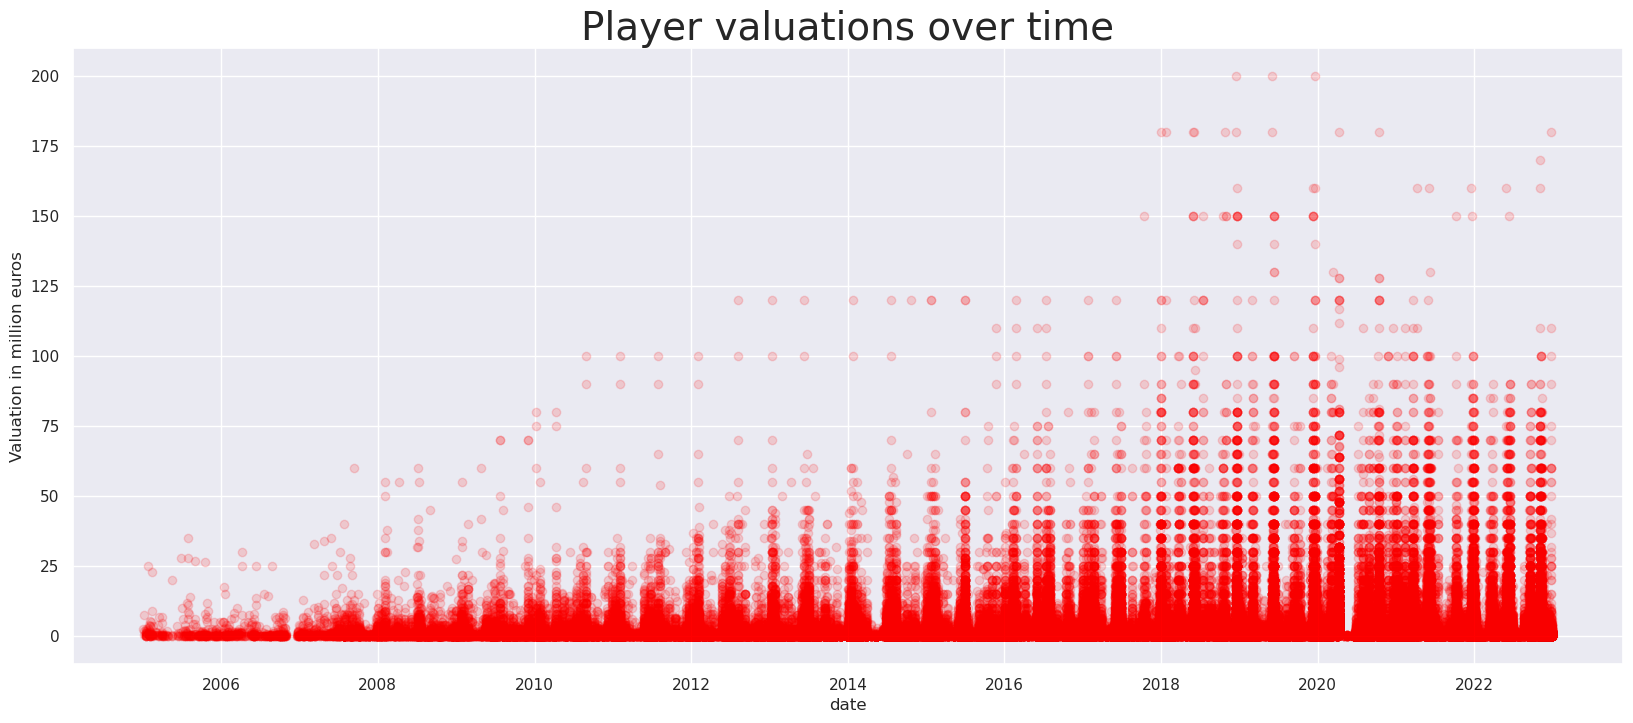

In [168]:
plt.figure(figsize = (20,8))
plt.scatter(player_valuations_df['datetime'], y= player_valuations_df['market_value_in_eur']/1000000, c = 'red', alpha= 0.15)
plt.xlabel('date');plt.ylabel('Valuation in million euros')
plt.title('Player valuations over time',fontsize=28)
plt.show()

The scatter plot of players shows that there is gradual rise in the value of players over the year 2006 to 2022. Majority of the players are at lower scale below the mark of 50 milliom euros

In [169]:
yeargroups1  = player_valuations_df.loc[:, ['market_value_in_eur', 'year']].groupby(['year']).count()\
.sort_values(by= 'year', ascending = True)

yeargroups2 = player_valuations_df.loc[:,['market_value_in_eur', 'year']] .groupby(['year']).sum() \
    .sort_values(by='year', ascending=True)

yeargroups3 = player_valuations_df.loc[:,['market_value_in_eur', 'year']].groupby(['year']).max() \
    .sort_values(by='year', ascending=True)

yeargroups4 = player_valuations_df.loc[:,['market_value_in_eur', 'year']] .groupby(['year']).min() \
    .sort_values(by='year', ascending=True)

yeargroups5 = player_valuations_df.loc[:,['market_value_in_eur', 'year']].groupby(['year']).median() \
    .sort_values(by='year', ascending=True)

yeargroups6 = player_valuations_df.loc[:,['market_value_in_eur', 'year']].groupby(['year']).mean() \
    .sort_values(by='year', ascending=True)

# yeargroups5

In [176]:
# yeargroups1

* yeargroups1 shows numeber of valuation recorded per year.
* yeargroups2 shows sum of all the market valuation recorded per year.
*  yeargroups3 shows maximum of valuation recorded per year.
*  yeargroups4 shows minimum of valuation recorded per year.
*  yeargroups5 shows median of valuation recorded per year.
* yeargroups6 shows mean of valuation recorded per year.

   


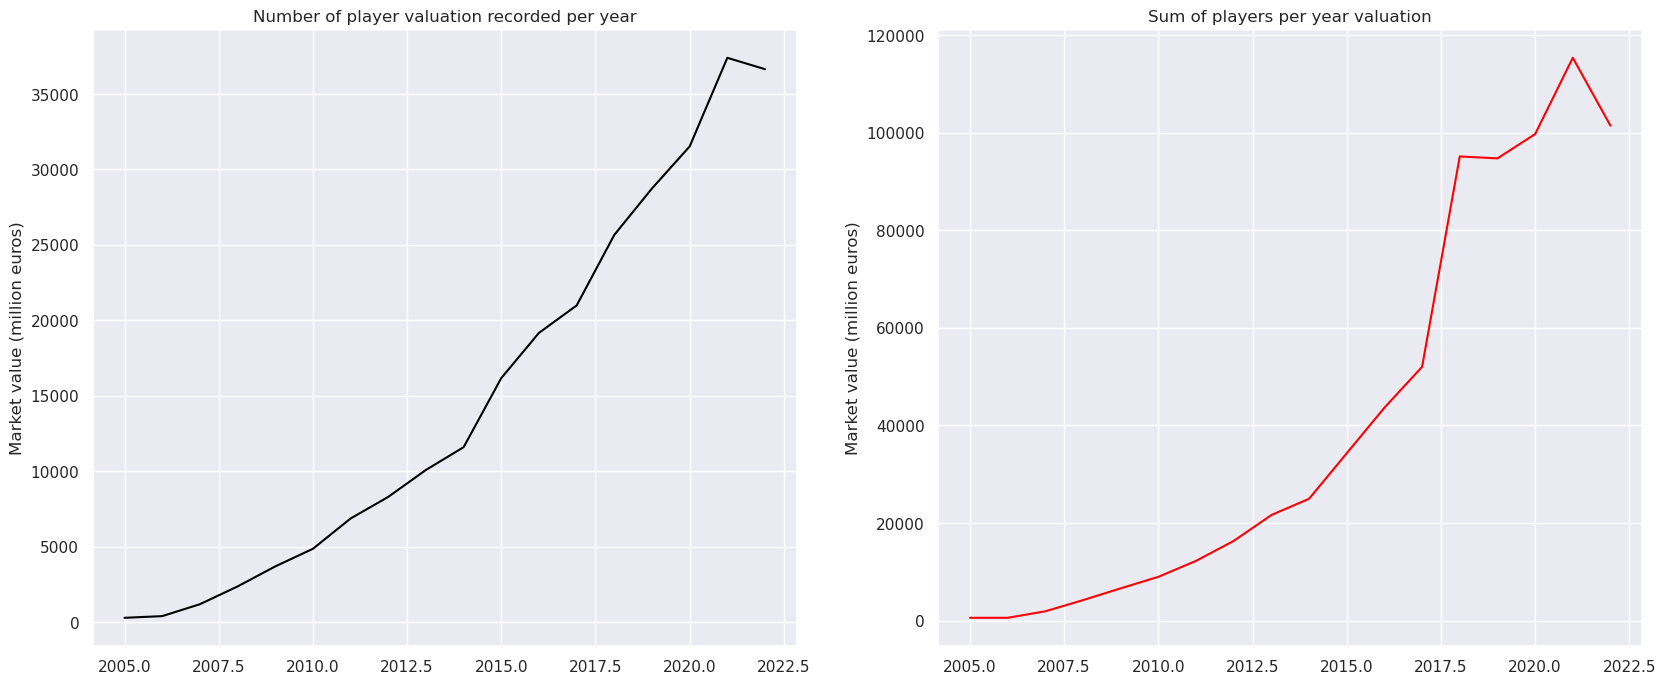

In [174]:
f = plt.figure(figsize = (20,8))
# ax = f.add_subplot(121)
# ax2 = f.add_subplot(122)

plt.subplot(1, 2, 1)
plt.title('Number of player valuation recorded per year')
plt.ylabel('Market value (million euros)')
plt.plot(yeargroups1.index, yeargroups1, color = 'black')

plt.subplot(1, 2, 2)
plt.title("Sum of players per year valuation")
plt.ylabel('Market value (million euros)')
plt.plot(yeargroups2.index, yeargroups2/1000000, color = 'red')
plt.show()


* The first graph shows the how the number of player valuation recorded changed over time. The slope of graph after 2015 is more steep than earlier, this shows that more values were recorded after 2015.

* The second graph shows how the sum of market value for partiular year is changing over time.

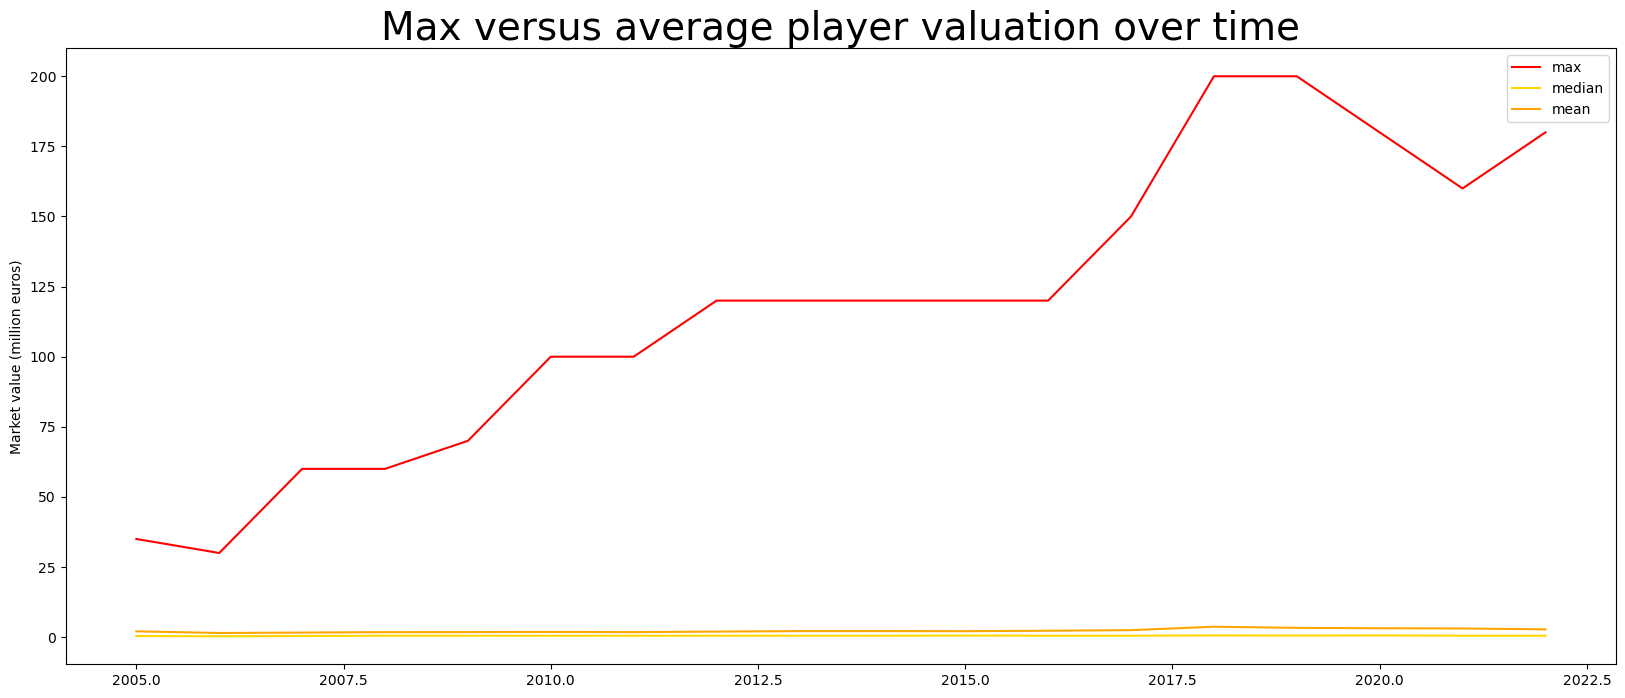

In [15]:
plt.figure(figsize=(20,8))
plt.title('Max versus average player valuation over time',fontsize=28)
plt.plot(yeargroups3.index,yeargroups3/1000000,color='r',label='max')
plt.plot(yeargroups5.index,yeargroups5/1000000,color='Gold',label='median')
plt.plot(yeargroups6.index,yeargroups6/1000000,color='Orange',label='mean')
plt.ylabel('Market value (million euros)')
plt.legend()
plt.show()


In [16]:
positions = players_df.position.unique()
positions

array(['Midfield', 'Attack', 'Goalkeeper', 'Defender', 'Missing'],
      dtype=object)

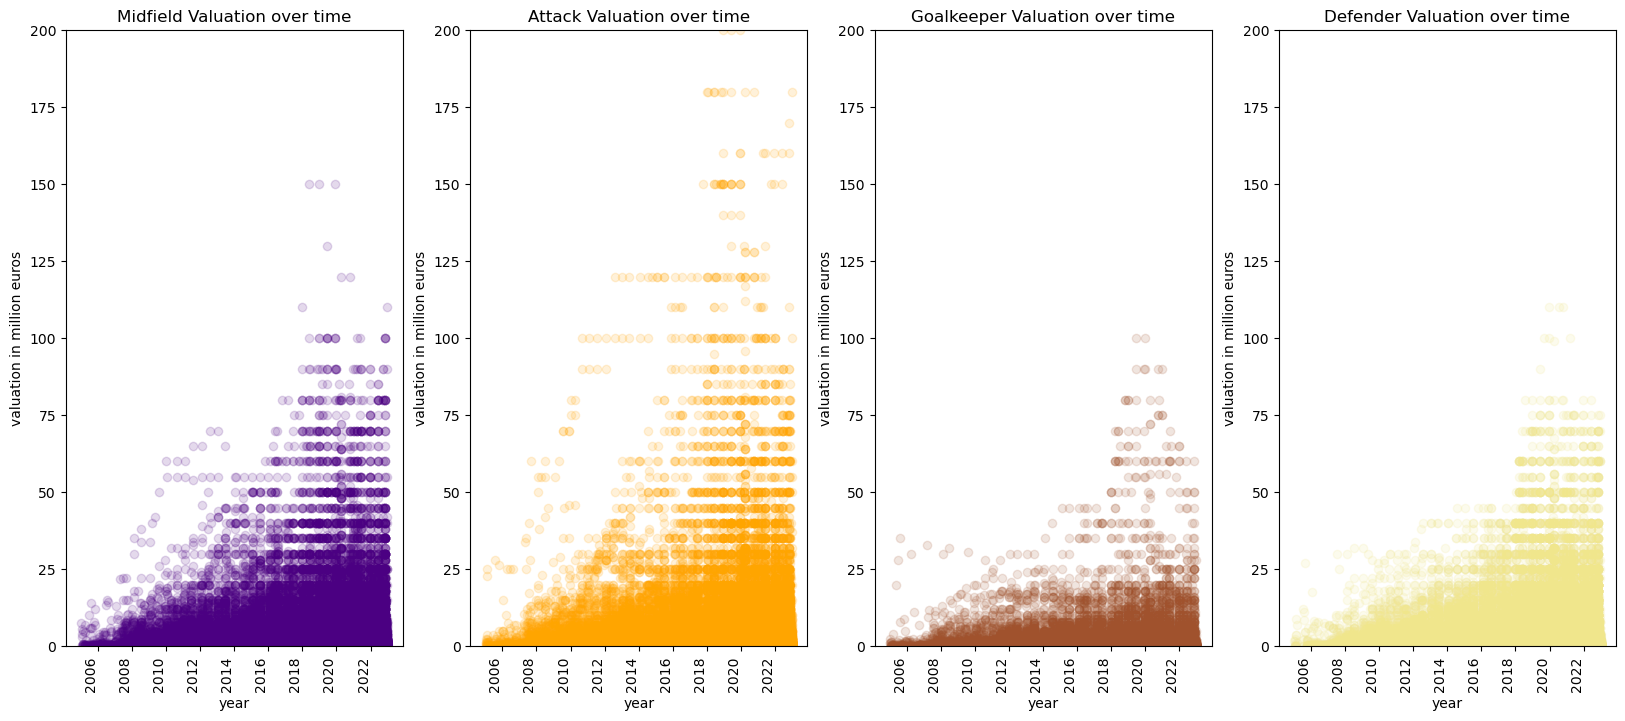

In [17]:
#valuation by position

plt.figure(figsize = (20, 8))
for i in range(0, len(positions)-1):
    plt.subplot(1,4,i+1)
    player_valuations_df1 = player_valuations_df[player_valuations_df.position == positions[i]]
    plt.scatter(player_valuations_df1['datetime'], y= player_valuations_df1['market_value_in_eur']/1000000, c= color[i-1], alpha= 0.15)
    plt.xlabel('year')
    plt.ylabel('valuation in million euros')
    plt.title(positions[i]+' Valuation over time')
    plt.ylim(0,200)
    plt.xticks(rotation= 90, ha='right')
    i+=1
plt.show()
    



**Observation**

Seperating player values in attack, midfield, defence and goal keeper positions shows that attacking position  generally achieves the highest values while goala keepers comaand lower values






***PLAYER DATA VISUALIZATION***

Exploring data related to players who's last season played was 2022 or 2023 with a market value of greater than 15 million euros.

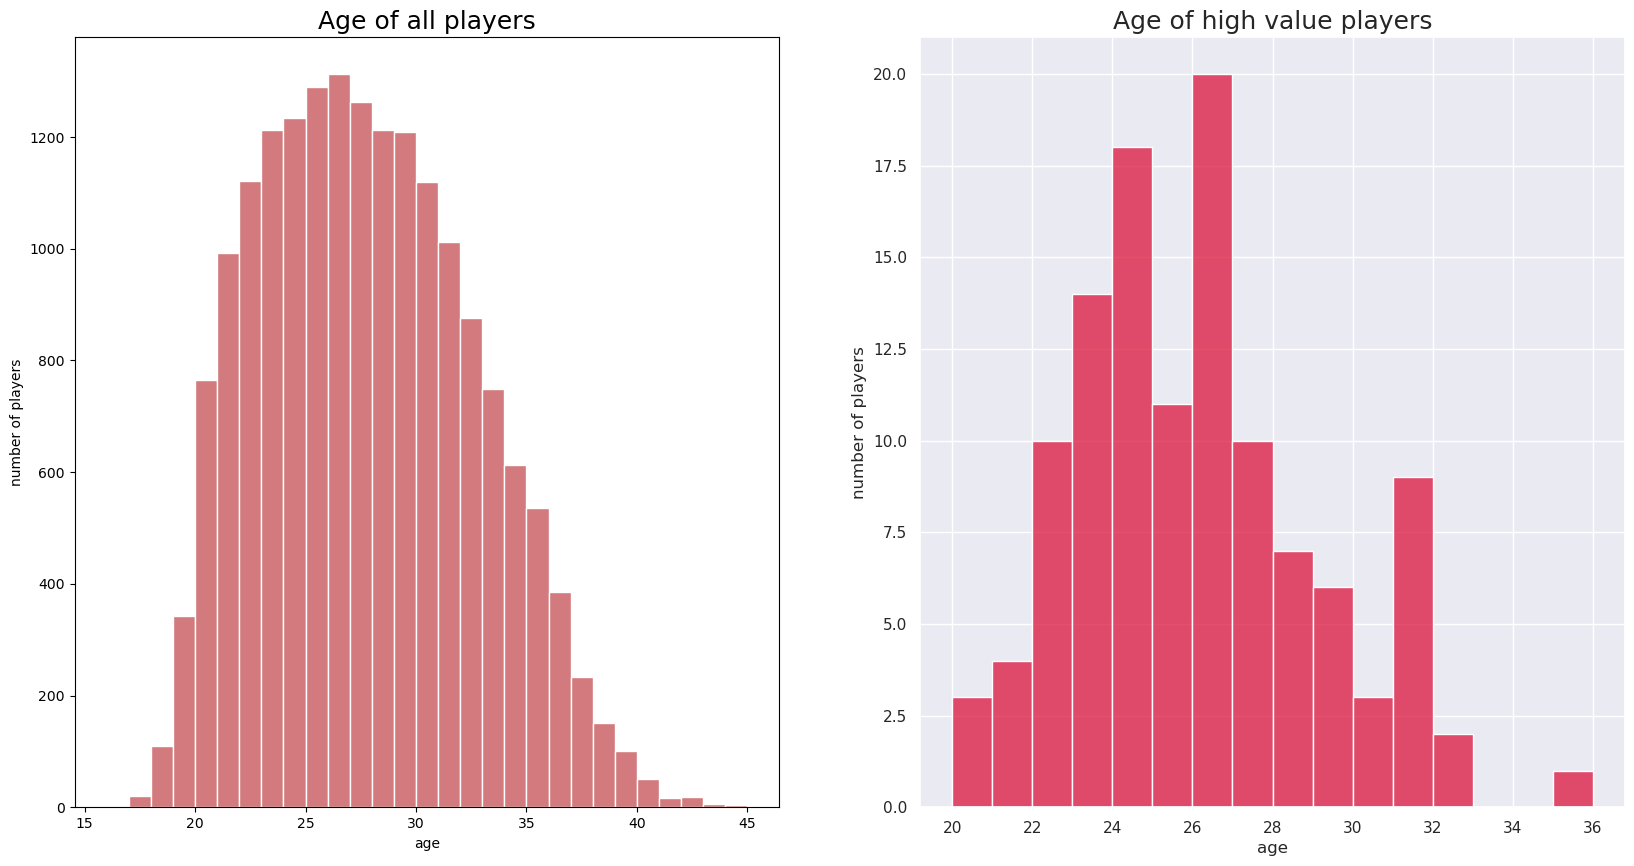

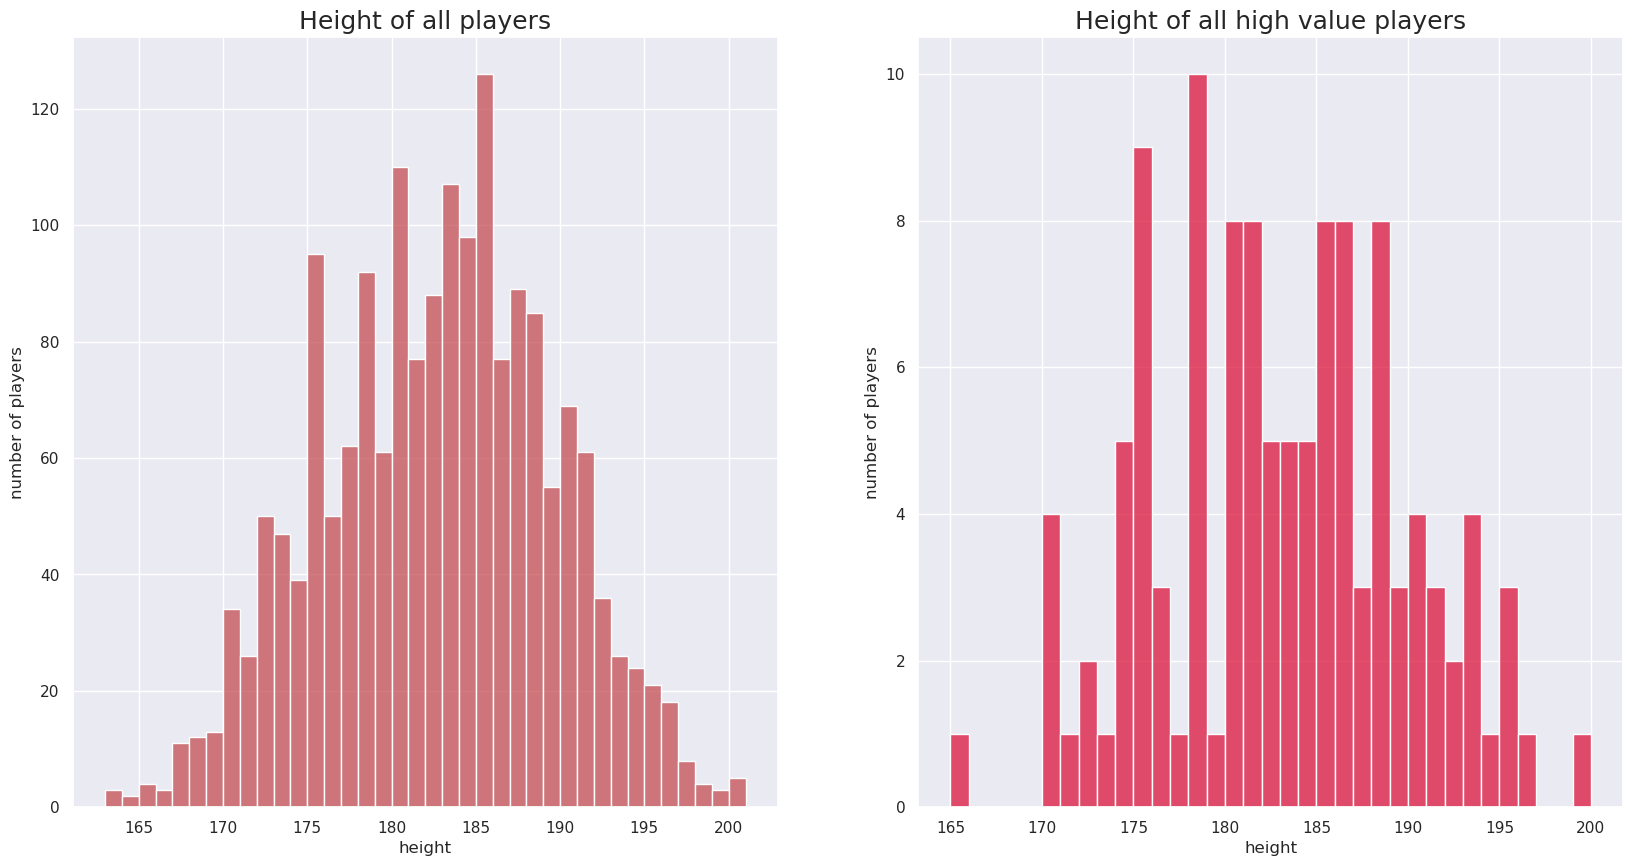

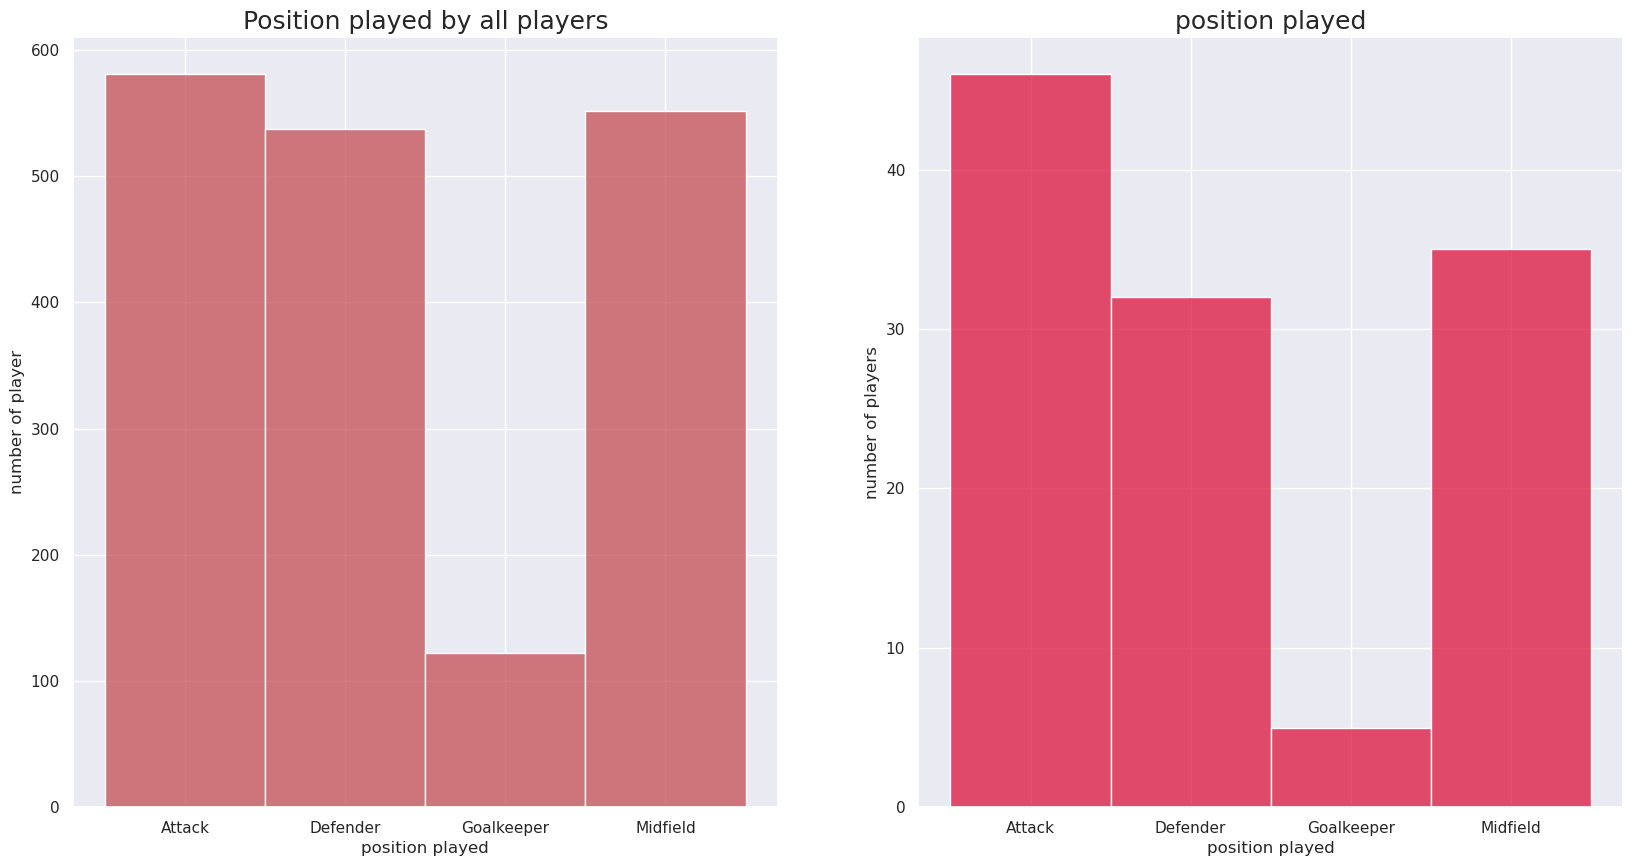

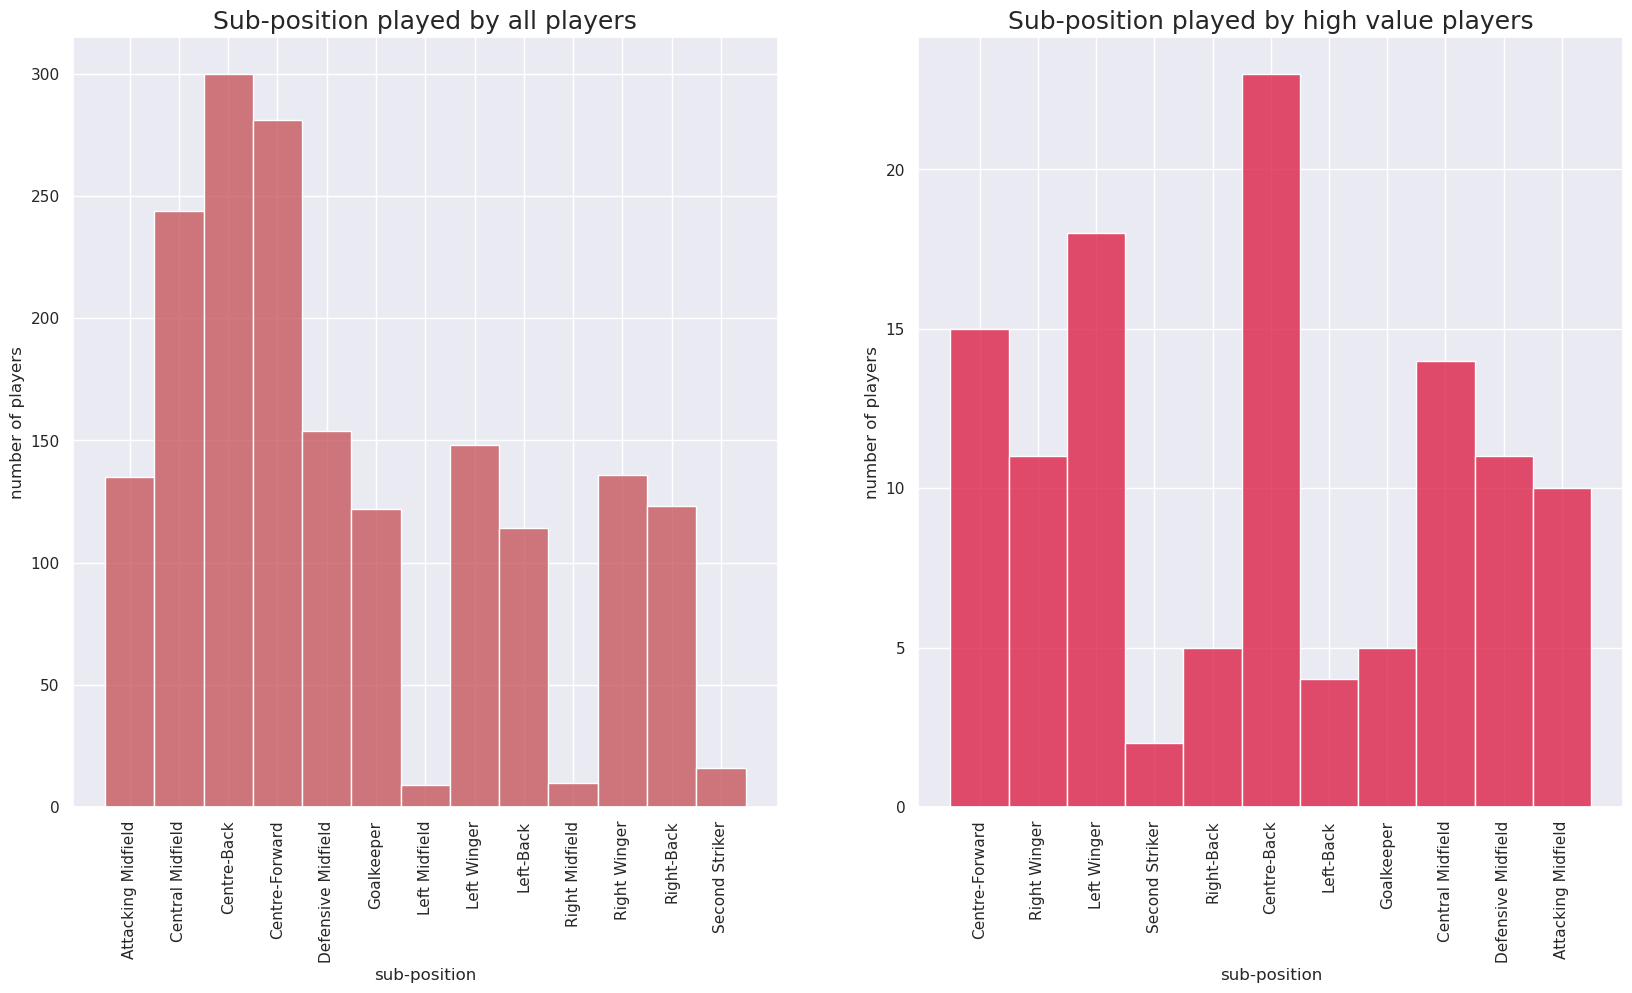

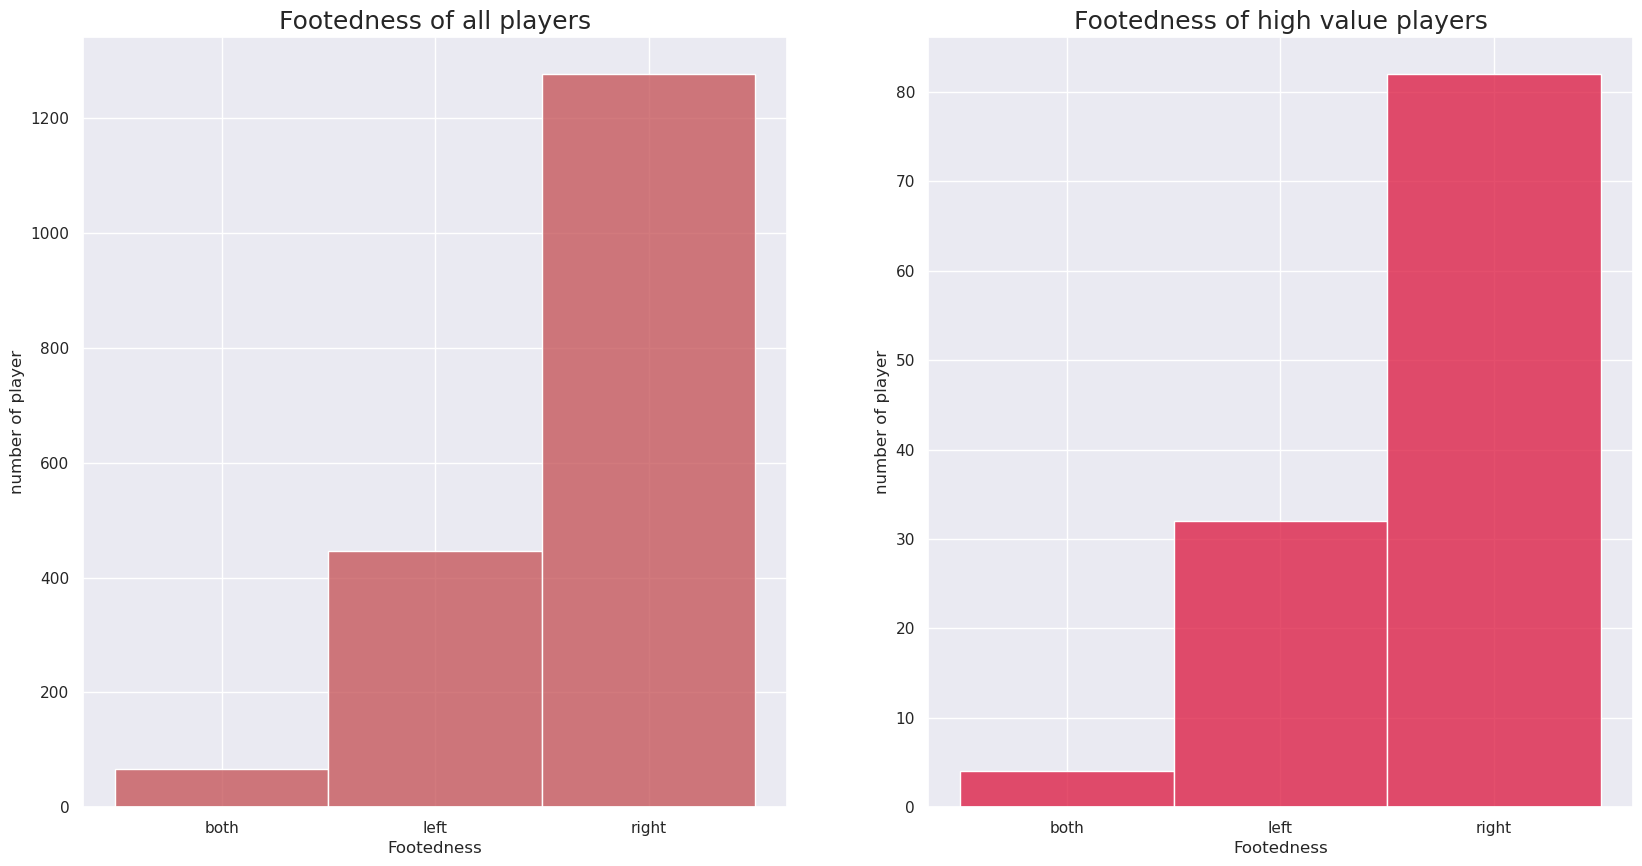

In [18]:
#Checking percentage of missing value in market value

# print(f"No. of missing value in Market value = {(players_df.highest_market_value_in_eur.isna() == True).sum()}")
# print(f"percent of missing value in Market value = {((players_df.highest_market_value_in_eur.isna() == True).sum()/players_df.shape[0])*100}")

# dropping players with no market value as percentage is low i.e (2.38%)

players_df1 = players_df[players_df.highest_market_value_in_eur.isnull() == False]

#order by market_value

players_df1 = players_df1.sort_values("highest_market_value_in_eur", ascending = False)

# filtering by season and market value

players_df1 = players_df1[(players_df1.last_season >= 2021) & (players_df1.highest_market_value_in_eur >= 10000000)]
high_value_players_df = players_df1[(players_df1.market_value_in_eur>40000000)]
positions = players_df.position.unique()

#Show player age distribution
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(x= 'age', data = players_df, binwidth = 1, color= 'r')
plt.title("Age of all players",fontsize=18)
plt.xlabel('age'); plt.ylabel('number of players')
plt.subplot(1, 2, 2)
sns.histplot(x='age',data=high_value_players_df, binwidth=1,color='crimson')
plt.title("Age of high value players",fontsize=18)
plt.xlabel('age'); plt.ylabel('number of players')

# show players height distribution

players_df2 = players_df1[(players_df1.height_in_cm.isnull()==False)]
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)

sns.histplot(x = 'height_in_cm', data = players_df2, binwidth = 1, color = 'r')
plt.title("Height of all players", fontsize = 18)
plt.xlabel("height"); plt.ylabel('number of players')

plt.subplot(1,2,2)
sns.histplot(x = "height_in_cm", data = high_value_players_df, binwidth = 1, color ='crimson')
plt.title("Height of all high value players", fontsize = 18)
plt.xlabel("height"); plt.ylabel('number of players')

# Show position data

players_df1 = players_df1.sort_values("position", ascending = True)
high_value_players_df1 = high_value_players_df.sort_values("position", ascending = True)

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.histplot(x = 'position', data = players_df1, binwidth = 1, color = 'r')
plt.title("Position played by all players", fontsize = 18)
plt.xlabel("position played"); plt.ylabel("number of player")

plt.subplot(1, 2, 2)
sns.histplot(x='position',data=high_value_players_df1, binwidth=1,color='crimson')
plt.title("position played",fontsize=18)
plt.xlabel('position played'); plt.ylabel('number of players')

#Show sub-position data

players_df1 = players_df1.sort_values('sub_position', ascending = True)
high_vlaue_players_df1 = high_value_players_df.sort_values('sub_position', ascending = True)

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.histplot(x = 'sub_position', data = players_df1, binwidth = 1, color = 'r')
plt.title("Sub-position played by all players", fontsize =18 )
plt.xticks(rotation = 90 )
plt.xlabel("sub-position")
plt.ylabel("number of players")

plt.subplot(1,2,2)
sns.histplot(x = 'sub_position', data = high_value_players_df1, binwidth = 1, color = 'crimson')
plt.title("Sub-position played by high value players", fontsize =18 )
plt.xticks(rotation = 90 )
plt.xlabel("sub-position")
plt.ylabel("number of players")

# show footedness data

players_df1 = players_df1.sort_values('foot', ascending = True)
high_value_players_df1 = high_value_players_df1.sort_values('foot', ascending = True)

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.histplot(x ='foot', data = players_df1, binwidth = 1, color = 'r')
plt.title("Footedness of all players", fontsize = 18)
plt.xlabel("Footedness"); plt.ylabel("number of player")

plt.subplot(1,2,2)
sns.histplot(x ='foot', data = high_value_players_df1, binwidth = 1, color = 'crimson')
plt.title("Footedness of high value players", fontsize = 18)
plt.xlabel("Footedness"); plt.ylabel("number of player")


plt.show()


**Oberservation on player data visualizations**

The distribution of age is skewed normal distribution and height is also normal. Distribution in high value players seems to be reflection of values within entire datasheet

**Appearance Visualizstions**

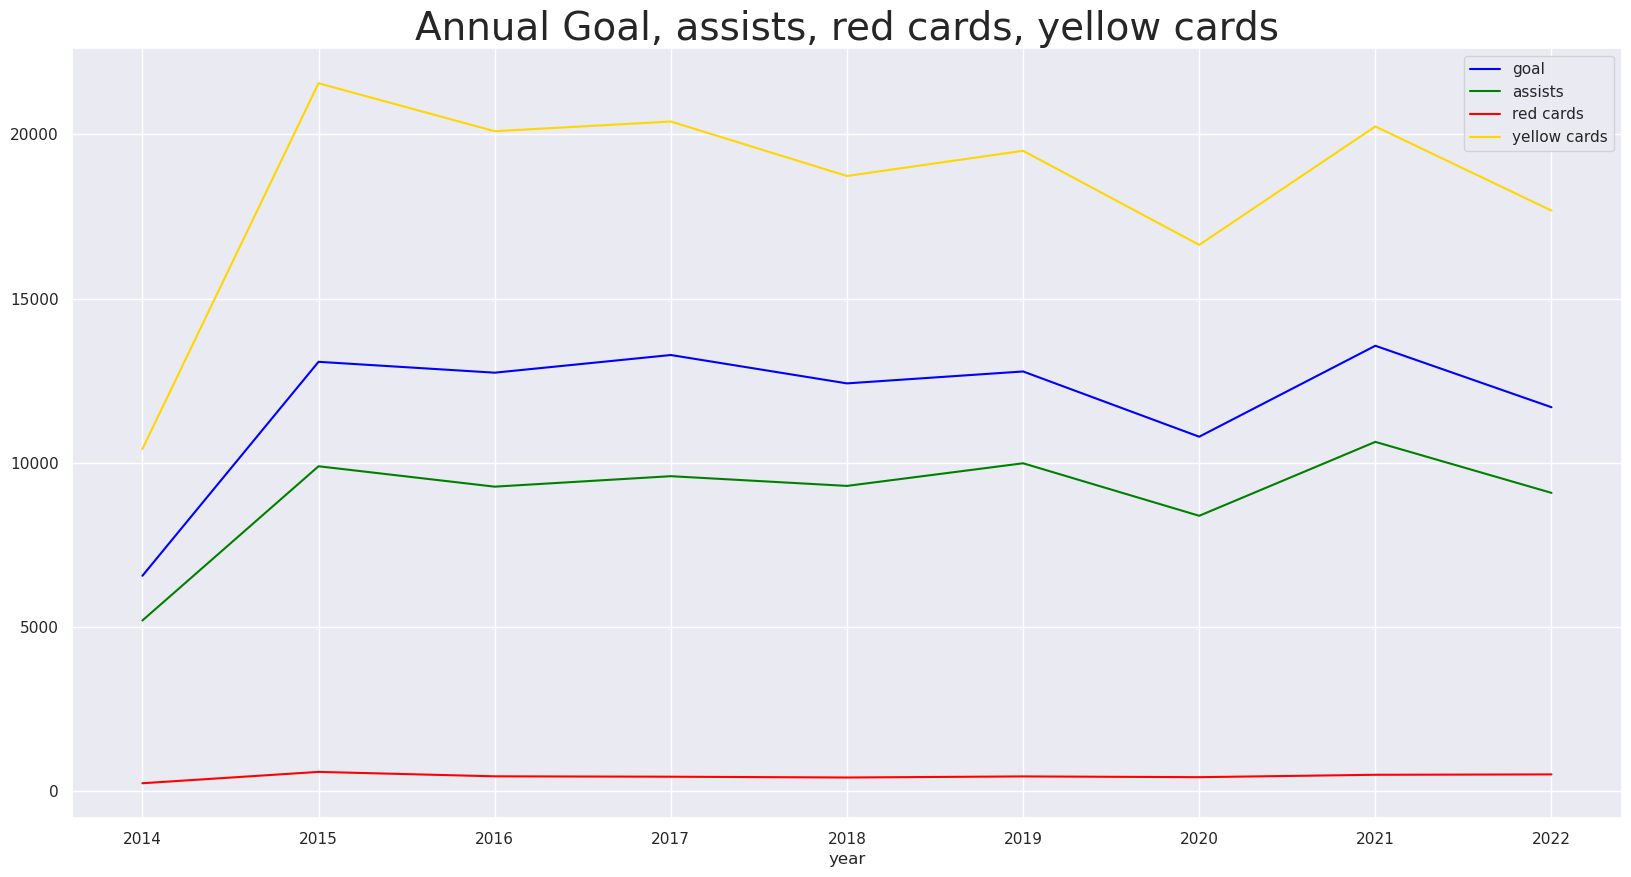

In [19]:
# print(appearances_df.columns); print(appearances_df.shape)
# print(appearances_df1.columns)

# filter range

appearances_df = appearances_df[(appearances_df.year > 2004) & (appearances_df.year <2023)]
high_value_appearances_df = appearances_df1[(appearances_df1.market_value_in_eur) > 40000000]

# Goals, assists, cards
plt.figure(figsize = (20,10))
yeargroups1 = appearances_df.loc[:,['goals', 'year']].groupby('year').sum().sort_values(by='year', ascending = True)
yeargroups2 = appearances_df.loc[:,['assists', 'year']].groupby('year').sum().sort_values(by='year', ascending = True)
yeargroups3 = appearances_df.loc[:,['red_cards', 'year']].groupby('year').sum().sort_values(by='year', ascending = True)
yeargroups4 = appearances_df.loc[:,['yellow_cards', 'year']].groupby('year').sum().sort_values(by='year', ascending = True)

plt.plot(yeargroups1.index, yeargroups1, color = 'blue', label = 'goal')
plt.plot(yeargroups2.index, yeargroups2, color = 'green', label = 'assists')
plt.plot(yeargroups3.index, yeargroups3, color = 'red', label = 'red cards')
plt.plot(yeargroups4.index, yeargroups4, color = 'gold', label = 'yellow cards')

plt.title("Annual Goal, assists, red cards, yellow cards", fontsize = 28)
plt.xlabel('year')
plt.legend()
plt.show()


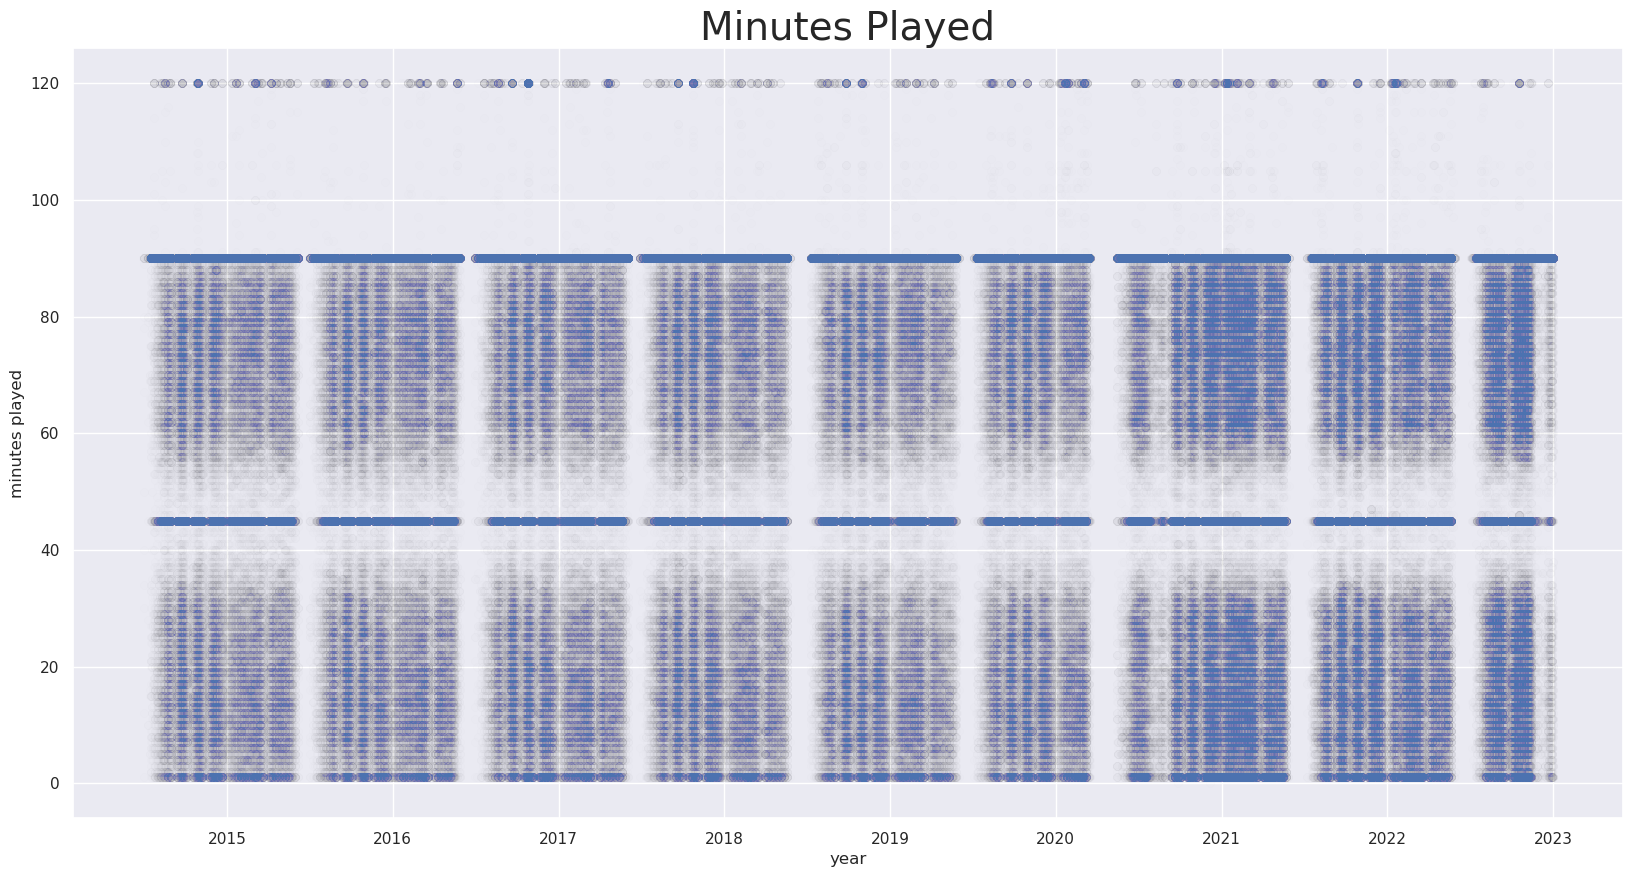

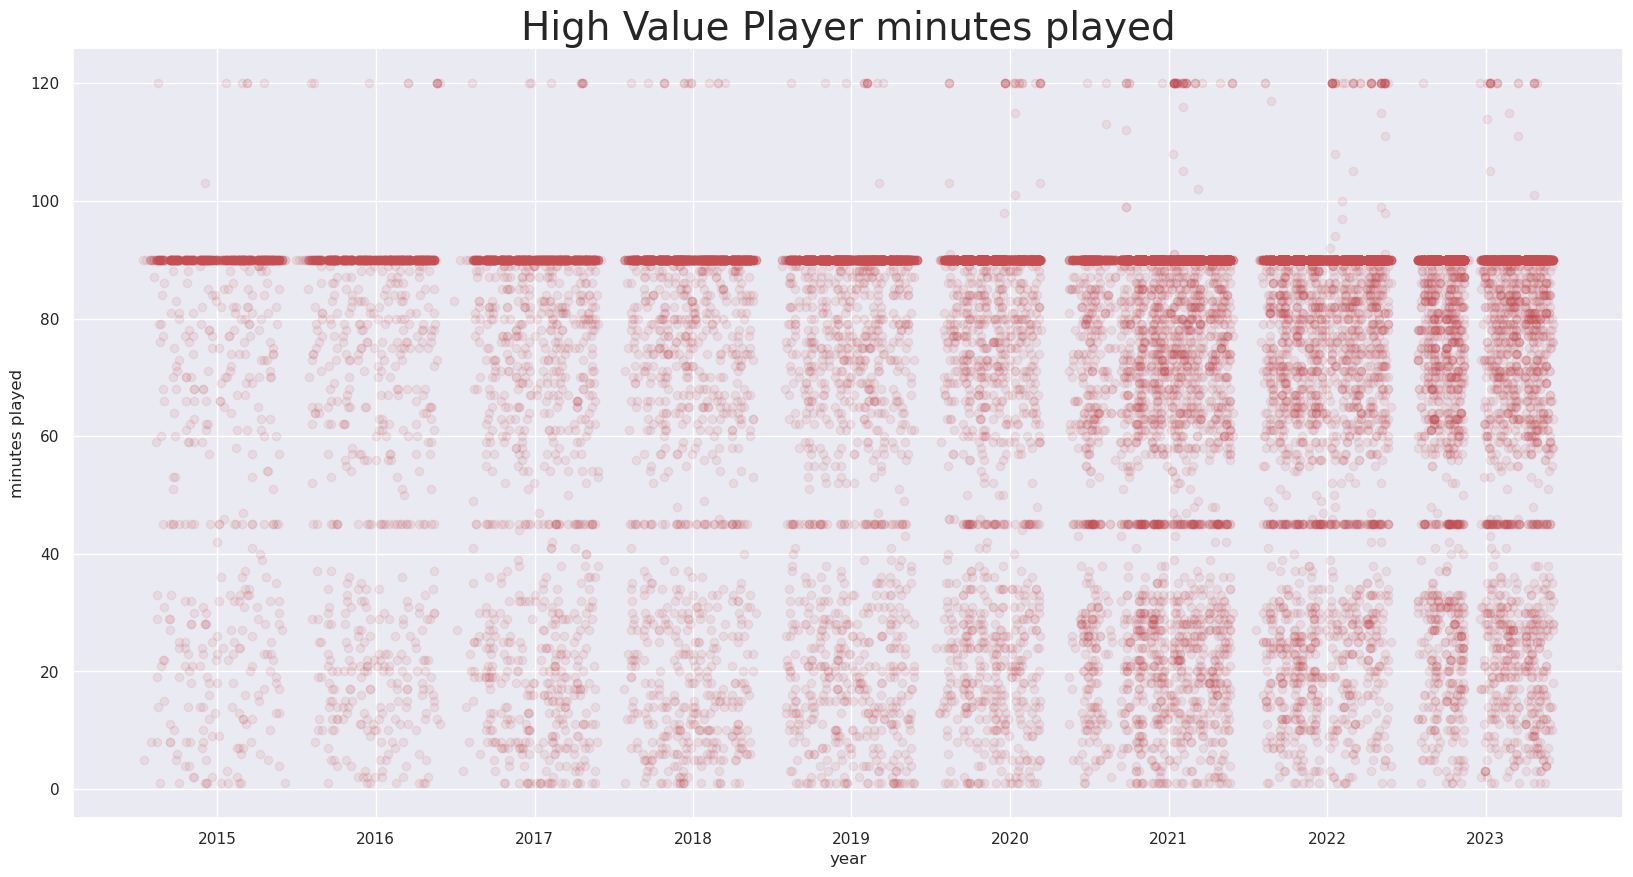

In [20]:
#Explore minutes played
plt.figure(figsize = (20,10))
plt.scatter(appearances_df['datetime'], y= appearances_df['minutes_played'], alpha = 0.0025, color = 'b')
plt.xlabel('year');plt.ylabel('minutes played')
plt.title("Minutes Played", fontsize = 28)
plt.show()

# Explore minutes played
plt.figure(figsize = (20,10))
plt.scatter(high_value_appearances_df['datetime'],y=high_value_appearances_df['minutes_played'],alpha=0.1,color='r')
plt.xlabel("year");plt.ylabel('minutes played')
plt.title('High Value Player minutes played',fontsize=28)
plt.show()

**Game Visualizations**

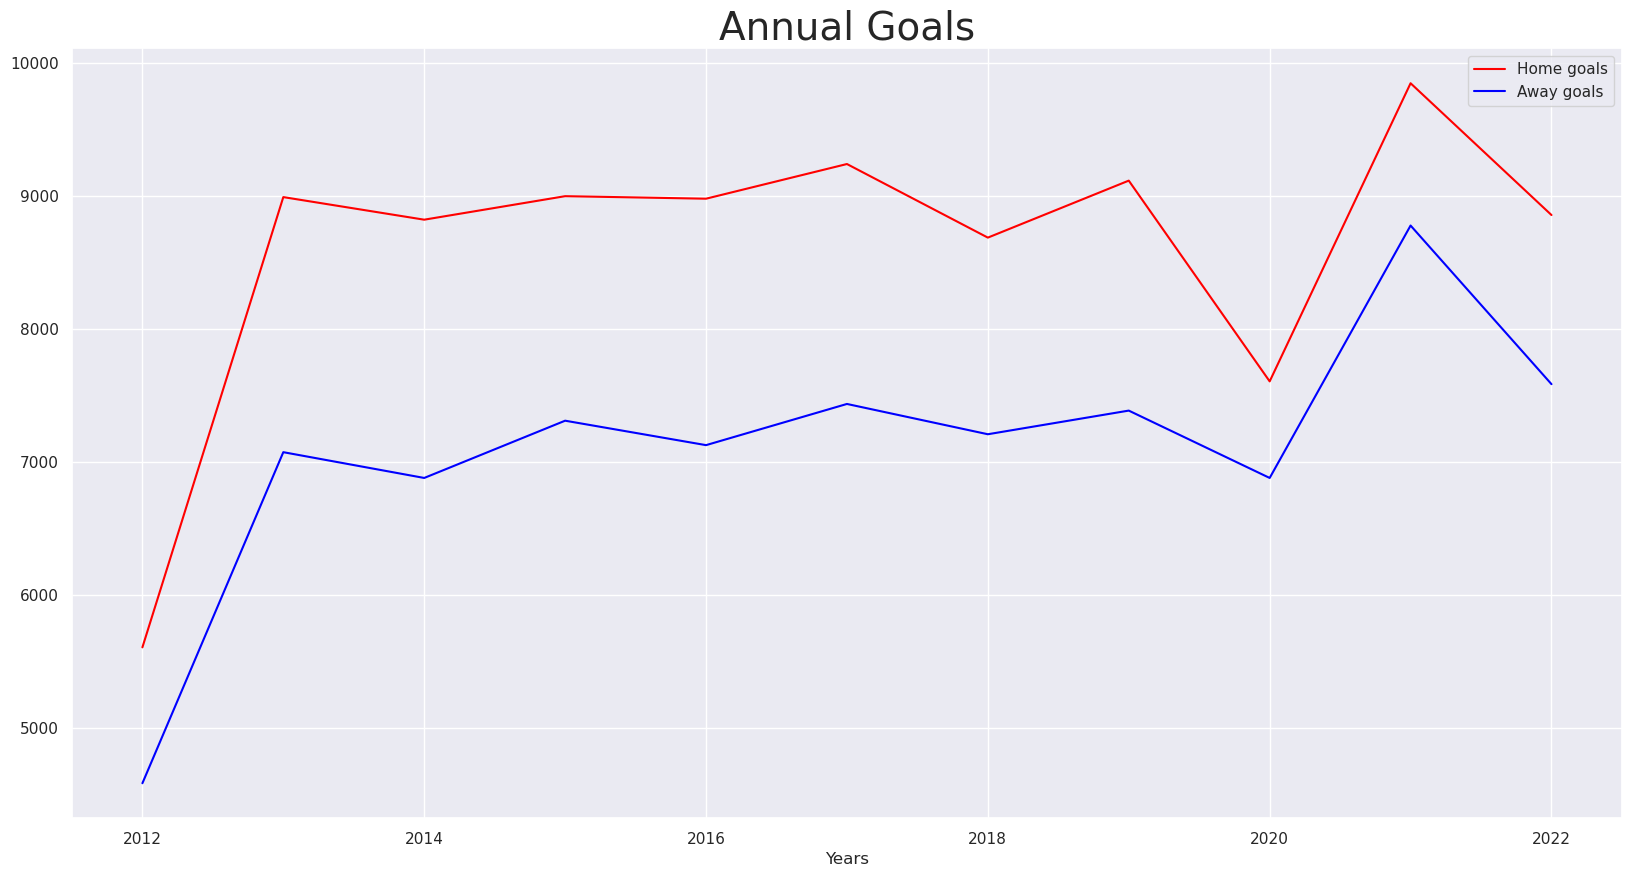

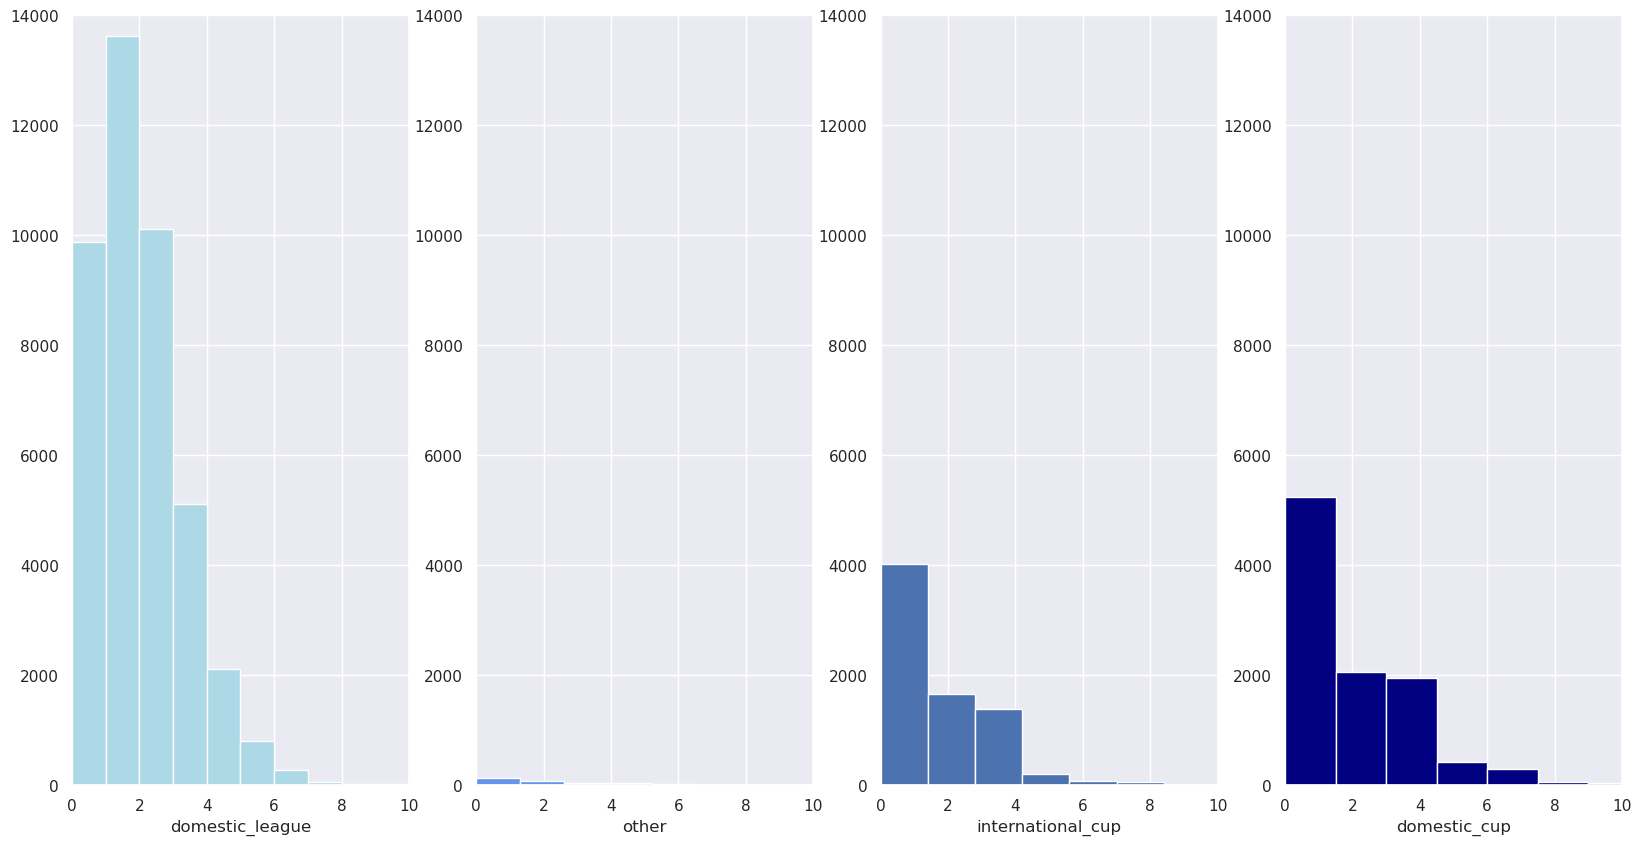

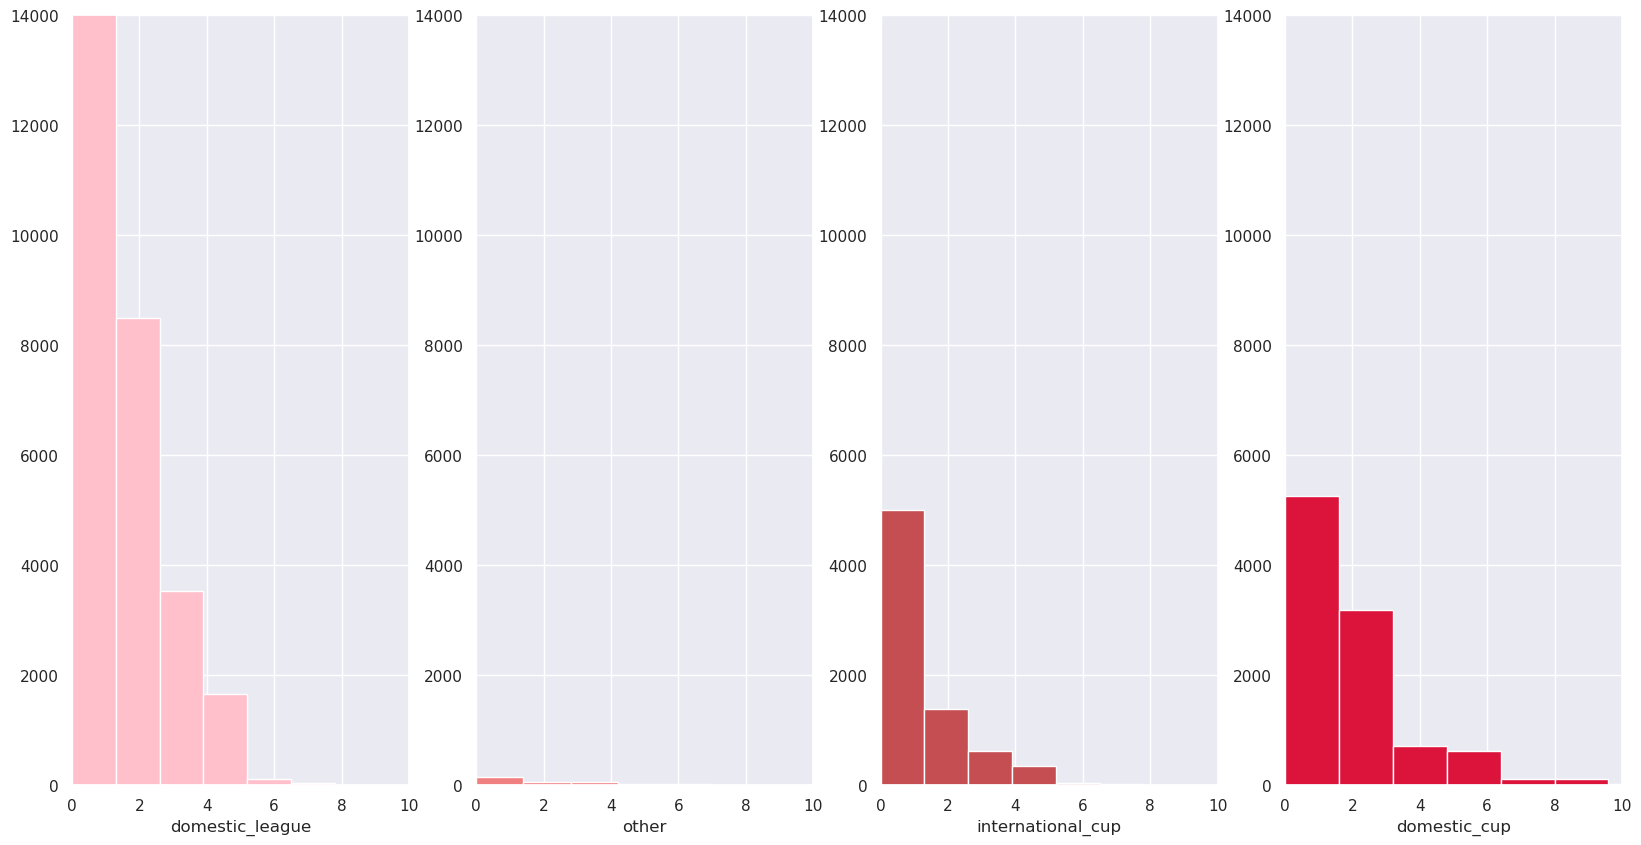

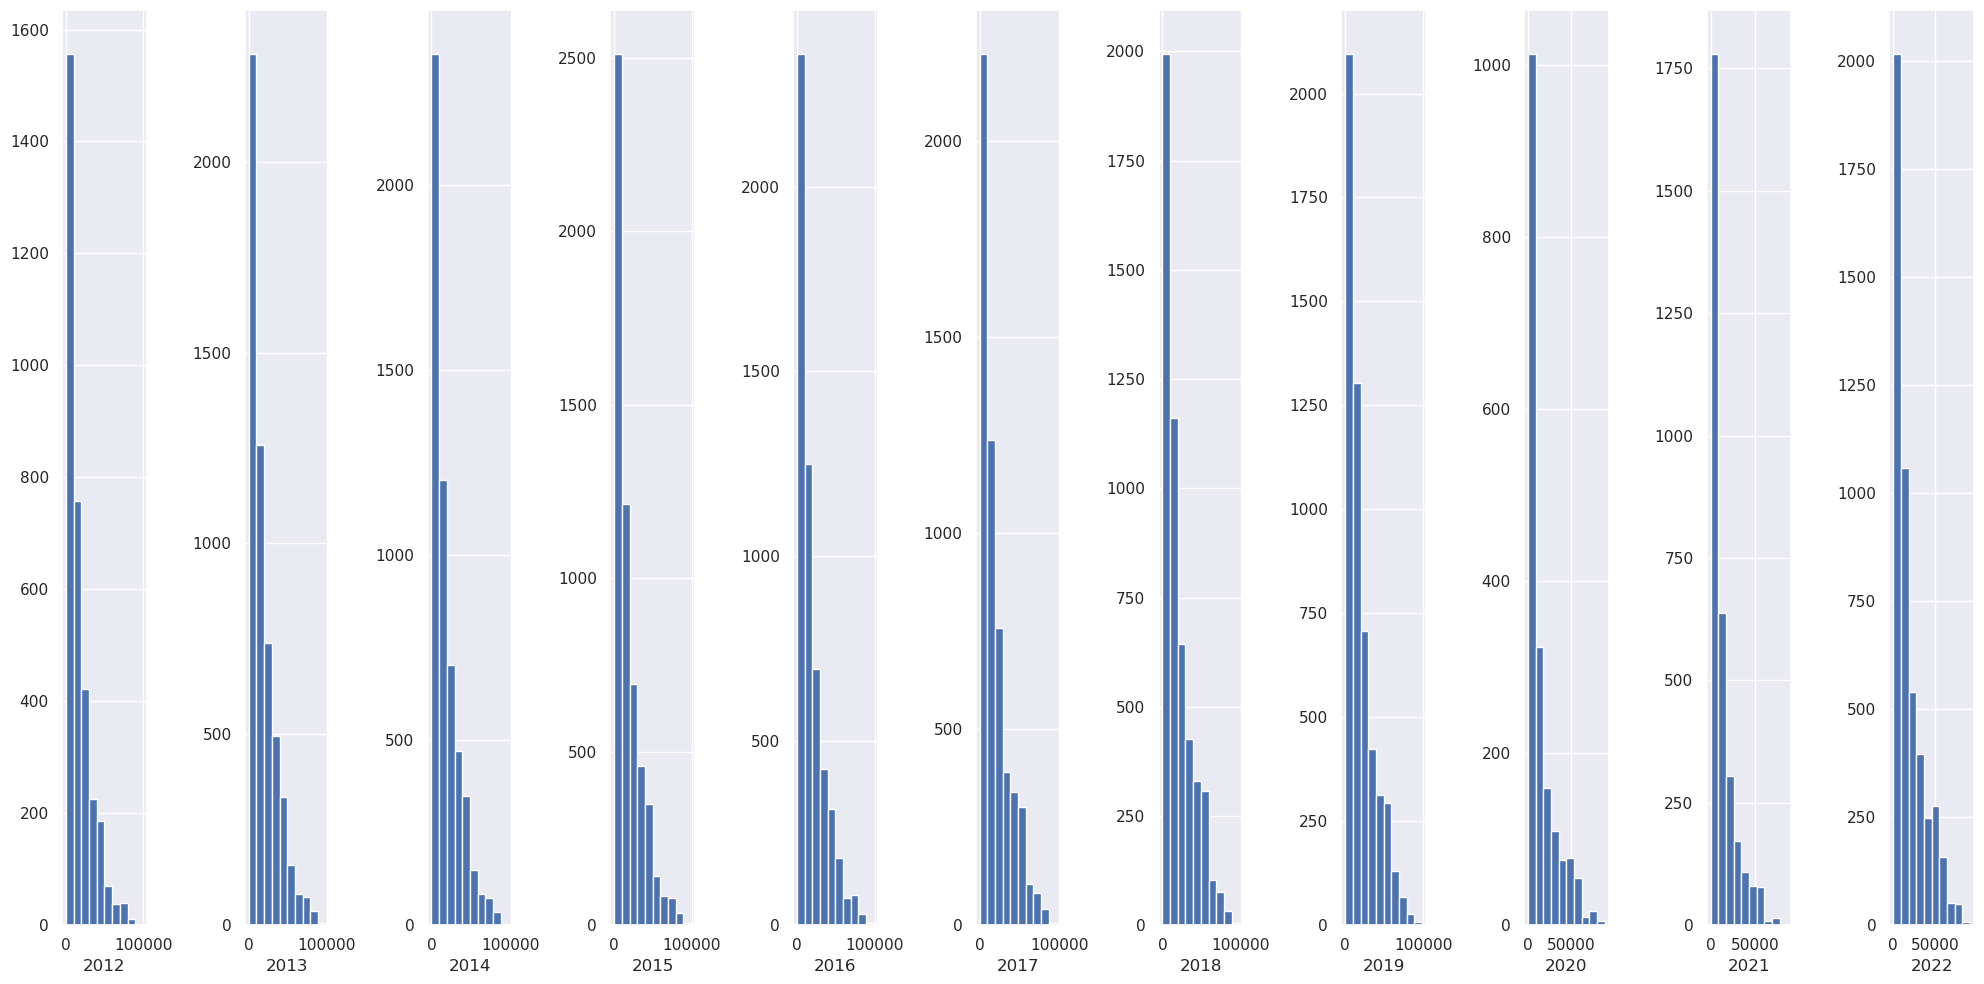

In [21]:
# print(games_df.columns); print(games_df.shape)

# add year to game valuations

games_df['datetime'] = pd.to_datetime(games_df['date'], format = "%Y-%m-%d")
games_df["year"] = games_df['datetime'].dt.year

#filter range

games_df = games_df[(games_df.year>2004) &(games_df.year<2023)]

#annual home versus away goals

yeargroups1 = games_df.loc[:, ['home_club_goals', 'year']].groupby('year').sum().sort_values(by='year', ascending= True)
yeargroups2 = games_df.loc[:, ['away_club_goals', 'year']].groupby('year').sum().sort_values(by='year', ascending= True)
plt.figure(figsize = (20,10))
plt.plot(yeargroups1.index, yeargroups1, color = 'red', label= 'Home goals')
plt.plot(yeargroups2.index, yeargroups2, color = 'blue', label= 'Away goals')
plt.title("Annual Goals", fontsize = 28)
plt.xlabel("Years")
plt.legend()
plt.show()

#home goals by competition type

n=1; colours = ['b','lightblue','cornflowerblue','b','navy']
competition_type = games_df['competition_type'].unique()
plt.figure(figsize = (20,10))
for type in competition_type:
    
    plt.subplot(1, len(competition_type),n); n+=1
    games_df1 = games_df[games_df.competition_type == type]
    plt.hist(games_df1['home_club_goals'], color = colours[n-1])
    plt.ylim(0, 14000);plt.xlim(0,10)
    plt.xlabel(type)

plt.show()


n=1;colour=['yellow','pink','lightcoral','r','crimson','brick']
plt.figure(figsize = (20,10))
for type in competition_type:
    plt.subplot(1, len(competition_type),n); n+=1
    games_df1 = games_df[games_df.competition_type == type]
    plt.hist(games_df1['away_club_goals'], color = colour[n-1])
    plt.ylim(0, 14000);plt.xlim(0,10)
    plt.xlabel(type)
plt.show()

# attendance by year
n=1;colour=['yellow','r','orange','b','g'];years=games_df['year'].unique()
plt.figure(figsize = (20,10))
for year in years:
   plt.subplot(1,len(years),n)
   attendance_df1 = games_df[(games_df.year==year)]                                             
   plt.hist(attendance_df1['attendance'])
   plt.xlabel(year)
   n+=1
plt.tight_layout()
plt.show()



**Data Visualisation of Market Value by age
**

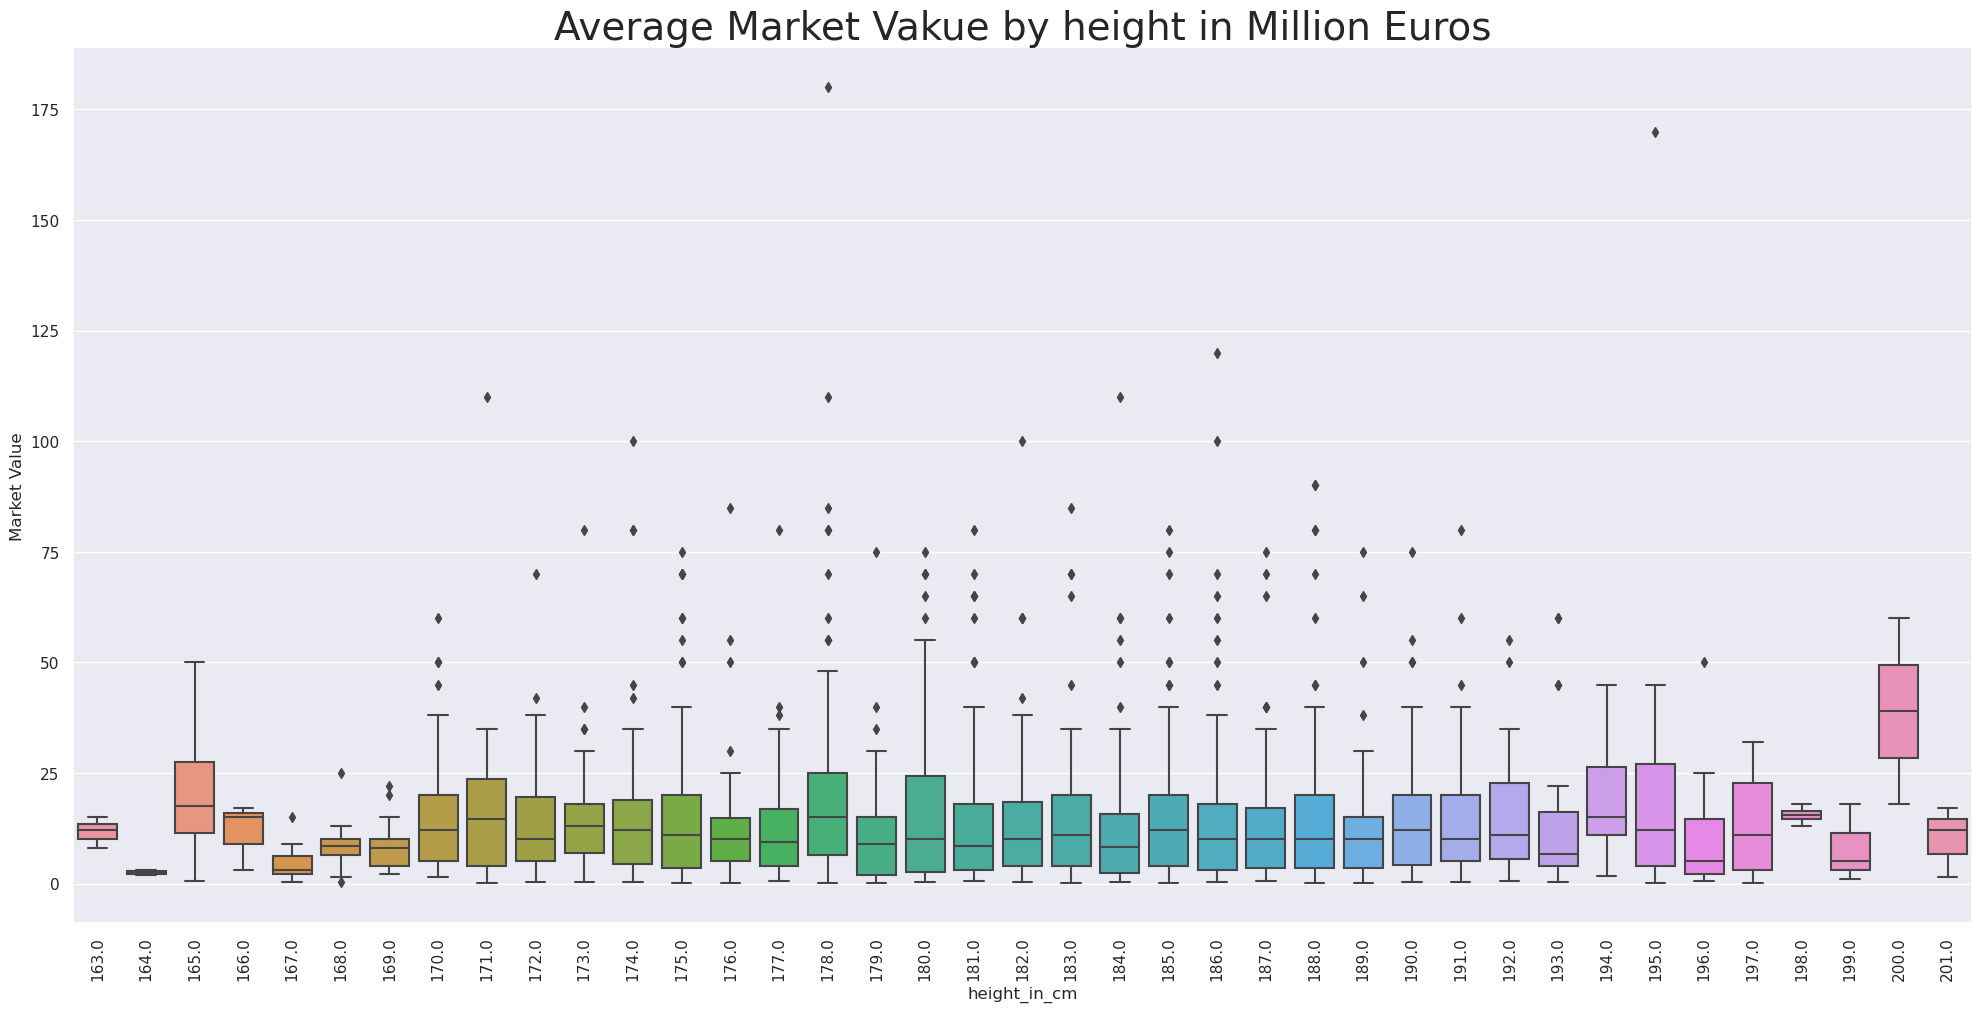

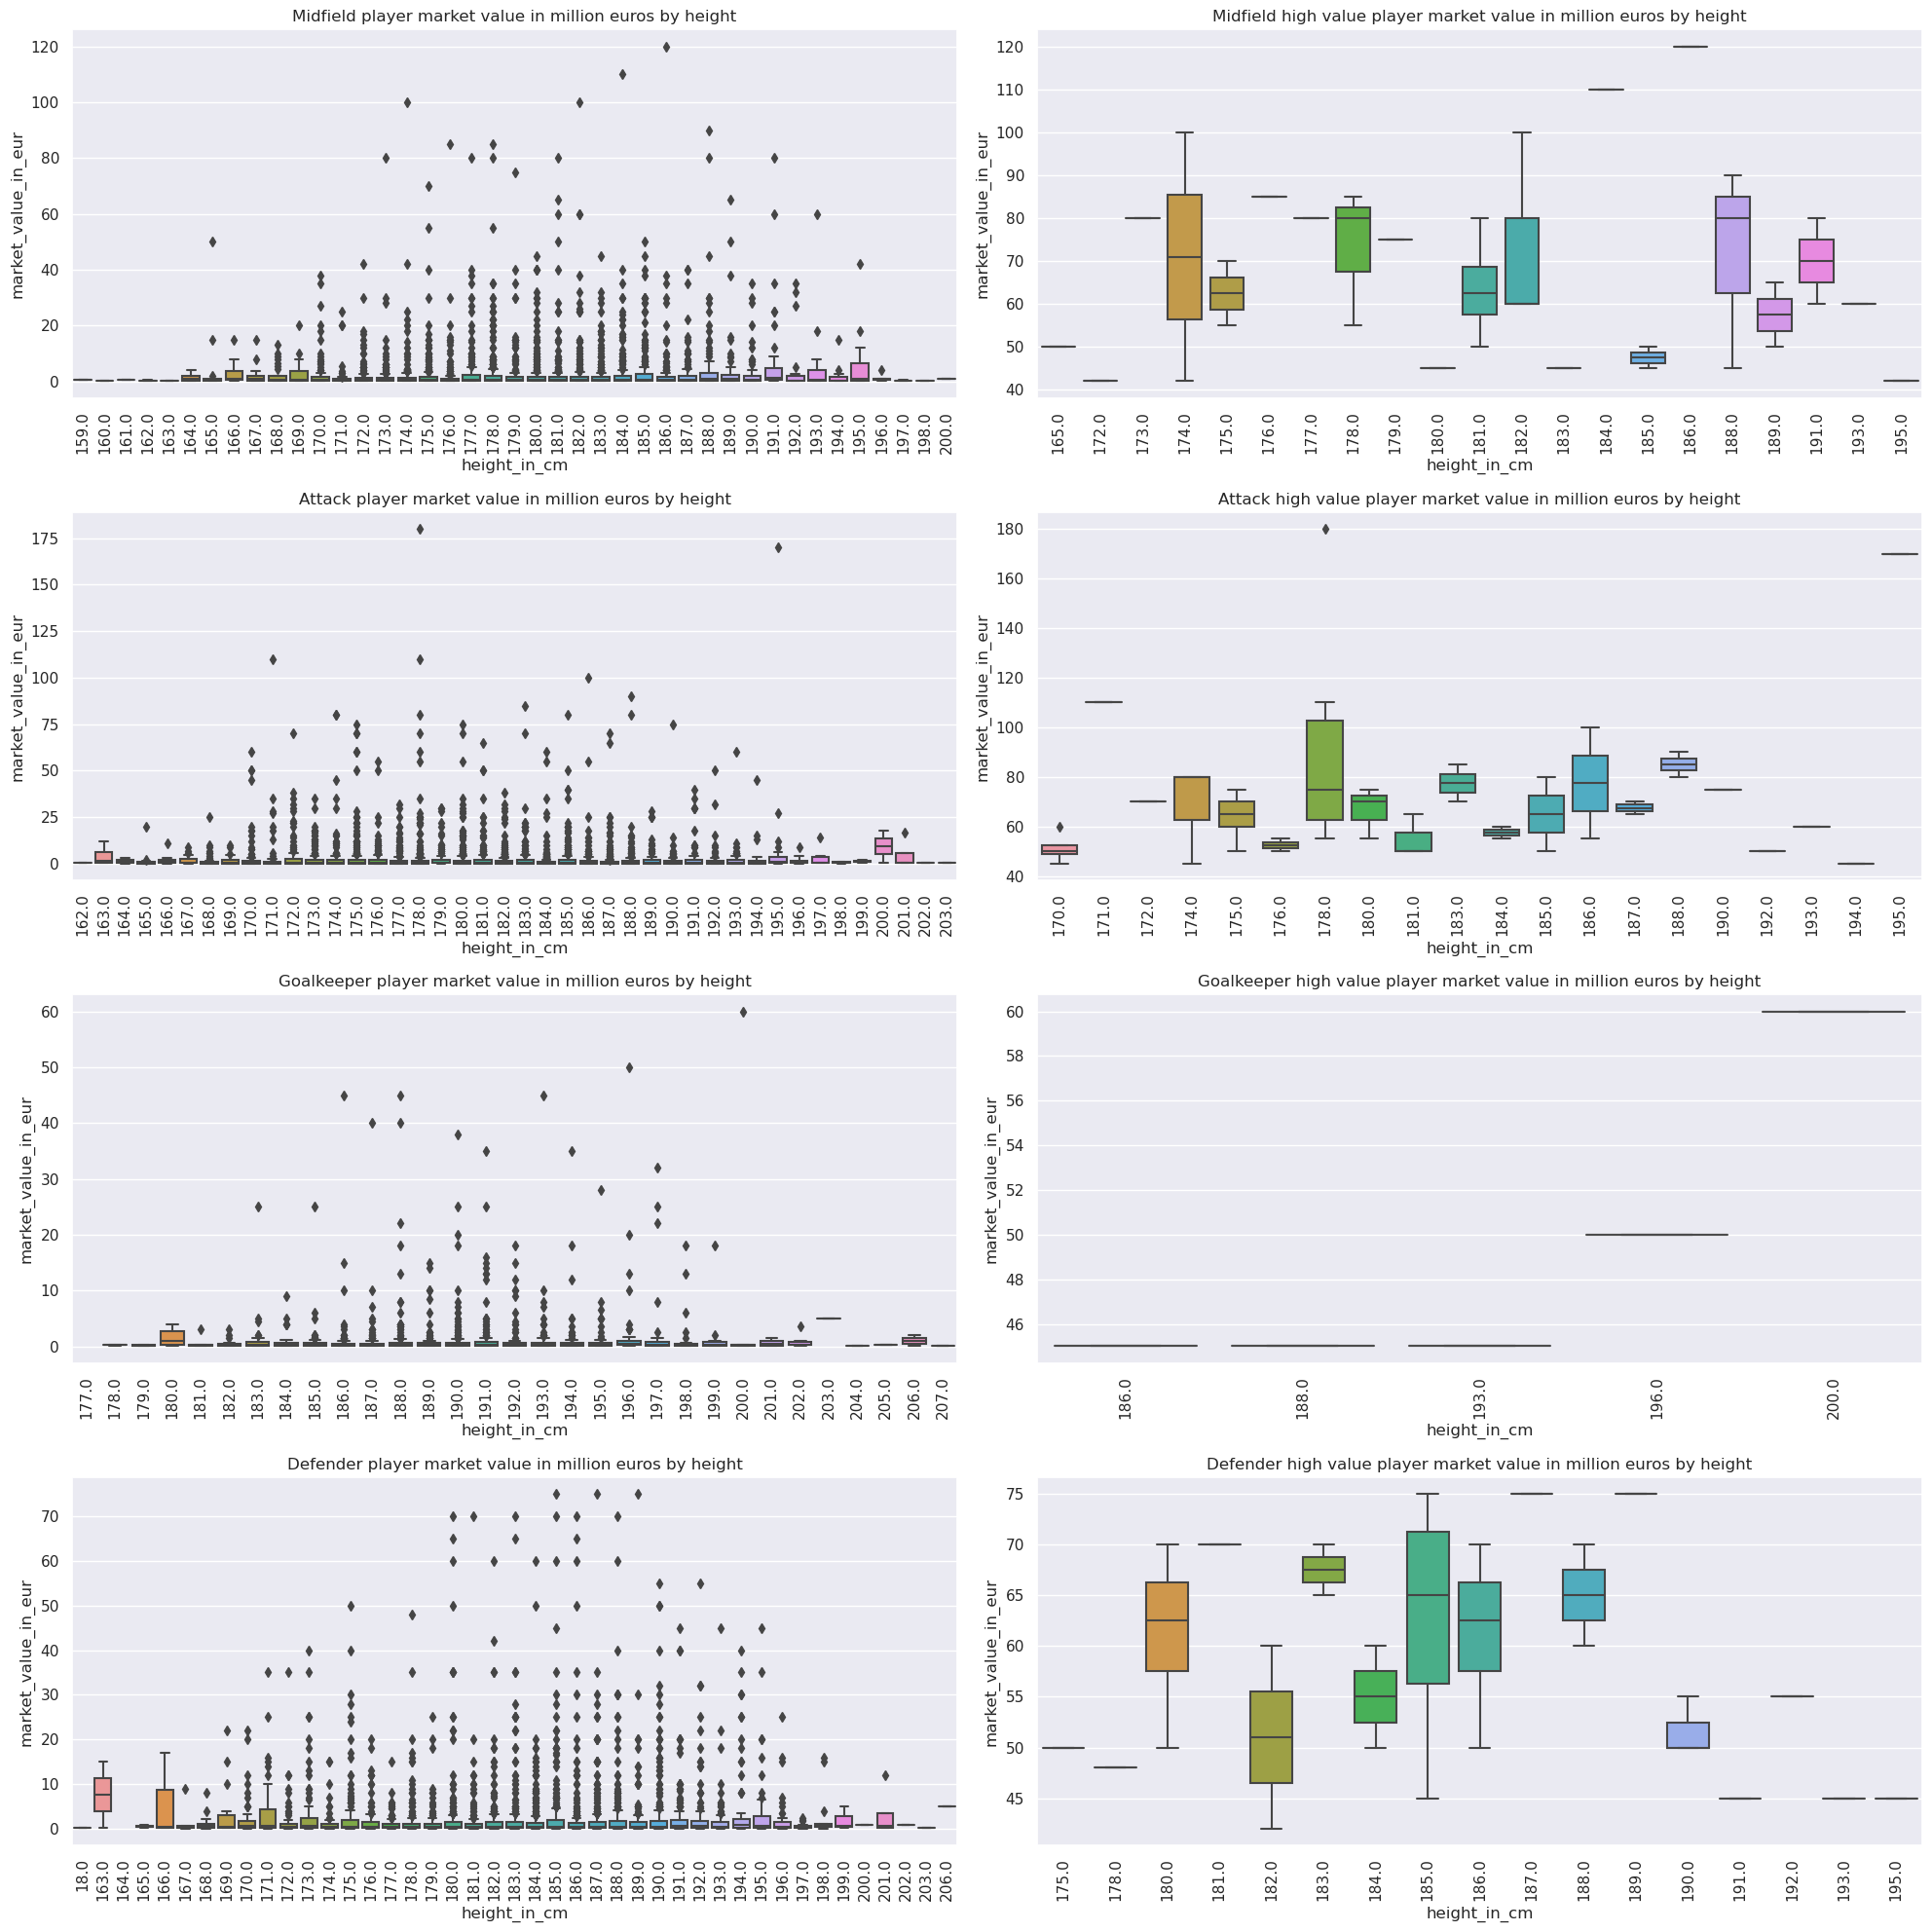

In [22]:
# print(f"No.of record without player's height = {(players_df.height_in_cm.isnull() == True).sum()}")
# print(f"Percentage of record without player's height = {((players_df.height_in_cm.isnull() == True).sum()/players_df.shape[0])*100}") --> 4.1269841269841265

#dropping players with no height
players_df3 = players_df[players_df.height_in_cm >=1]
#market value by height
plt.figure(figsize = (20,10))
heightgroups1= players_df.loc[:,["market_value_in_eur", "height_in_cm"]].groupby("height_in_cm").mean().sort_values(by= "market_value_in_eur", ascending = False)
sns.boxplot(x=players_df1["height_in_cm"], y=(players_df1['market_value_in_eur'])/1000000)
plt.ylabel("Market Value")
plt.title('Average Market Vakue by height in Million Euros', fontsize = 28)
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

# Market Value for each position by height
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(421);ax2 = f.add_subplot(422);ax3 = f.add_subplot(423);ax4 = f.add_subplot(424)
ax5 = f.add_subplot(425);ax6 = f.add_subplot(426);ax7 = f.add_subplot(427);ax8 = f.add_subplot(428)

n=1
for i in range(0, len(positions)-1):
    plt.subplot(4,2,n); 
    players_df4 = players_df3[players_df.position == positions[i]]
#     heightgroups1 = players_df4[:, ['market_value_in_eur','height_in_cm']].groupby('height_in_cm').median().sort_values(by = "market_value_in_eur", ascending = False)
    sns.boxplot(x  =players_df4['height_in_cm'], y= players_df4['market_value_in_eur']/1000000)
    title = str(positions[i]+" player market value in million euros by height")
    plt.title(title)
    plt.xticks(rotation = 90)
    n+=1
    plt.subplot(4,2,n); 
    high_value_players_df2 = high_value_players_df[high_value_players_df['position'] == positions[i]]
#     heightgroups = high_value_players_df2.loc[:,['market_value_in_eur', 'height_in_cm']] \
#     .groupby(['height_in_cm']) \
#     .median() \
#     .sort_values(by='market_value_in_eur', ascending=False)
    sns.boxplot(x=high_value_players_df2["height_in_cm"], y=(high_value_players_df2['market_value_in_eur'])/1000000)
    title=str(positions[i]+' high value player market value in million euros by height')
    plt.title(title);n+=1
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()



**Top Player by Market Value**

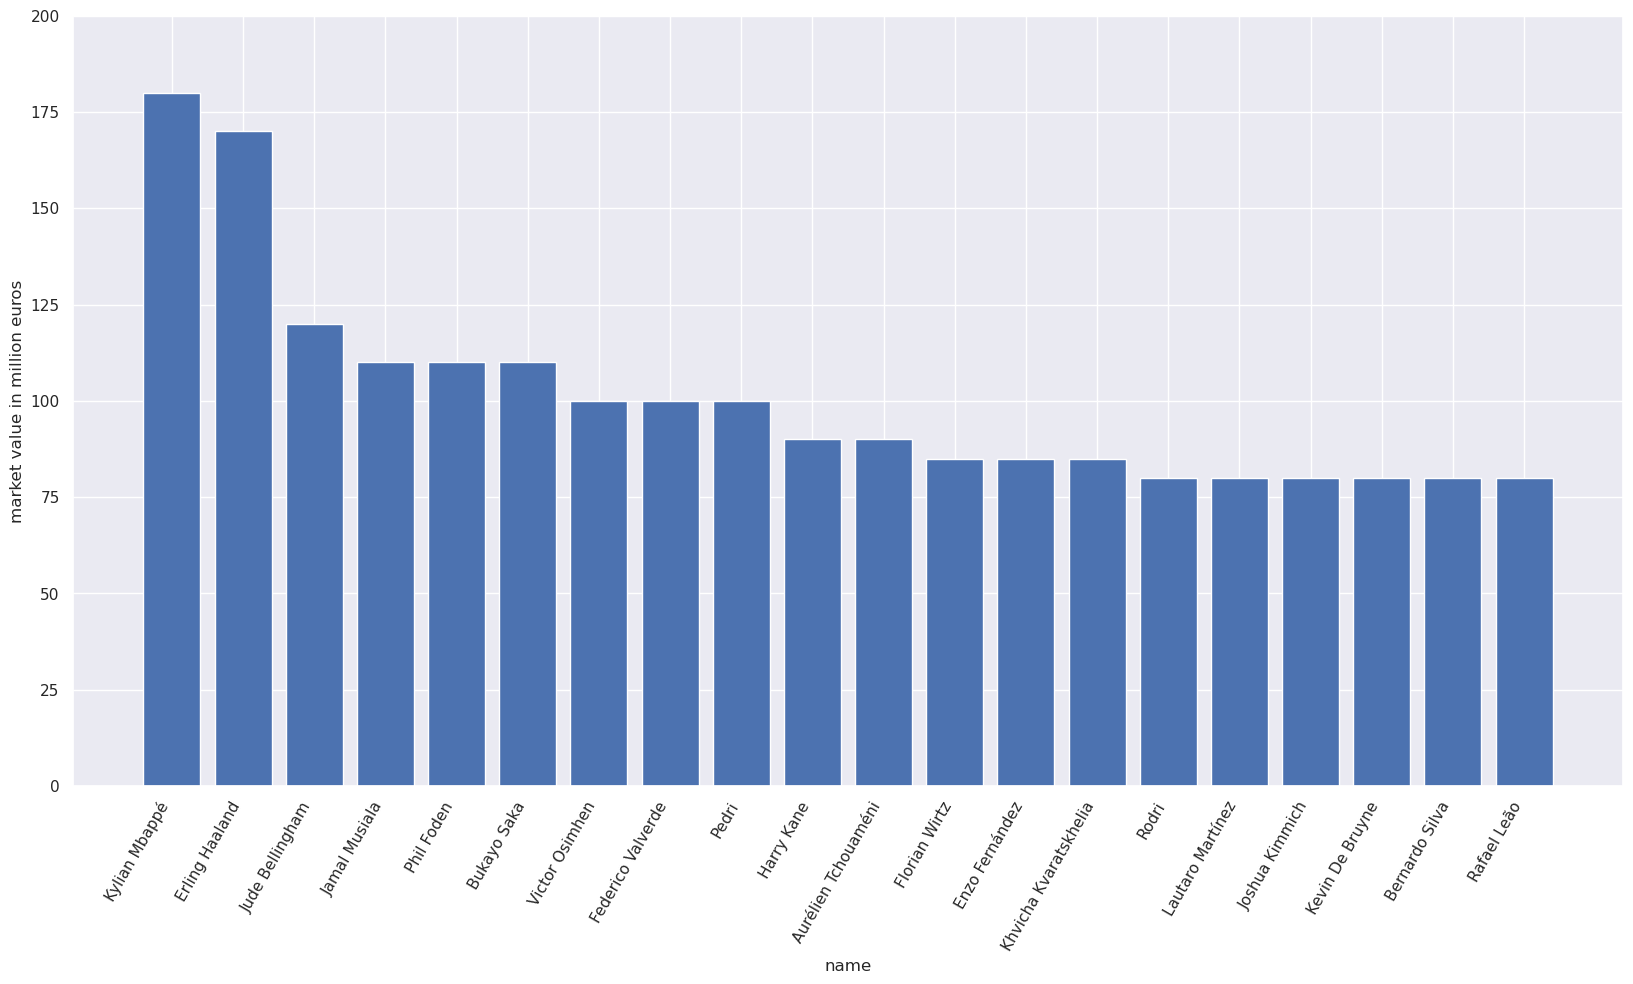

In [23]:
high_value_players_df2 = high_value_players_df1.sort_values("market_value_in_eur", ascending = False)
highest_value_players_df2 = high_value_players_df1.sort_values("highest_market_value_in_eur", ascending = False)

plt.bar(high_value_players_df2['name'].head(20), (high_value_players_df2['market_value_in_eur'].head(20))/1000000)
plt.ylim(0,200)
plt.xticks(rotation = 60, ha="right")
plt.xlabel('name')
plt.ylabel('market value in million euros')
plt.show()



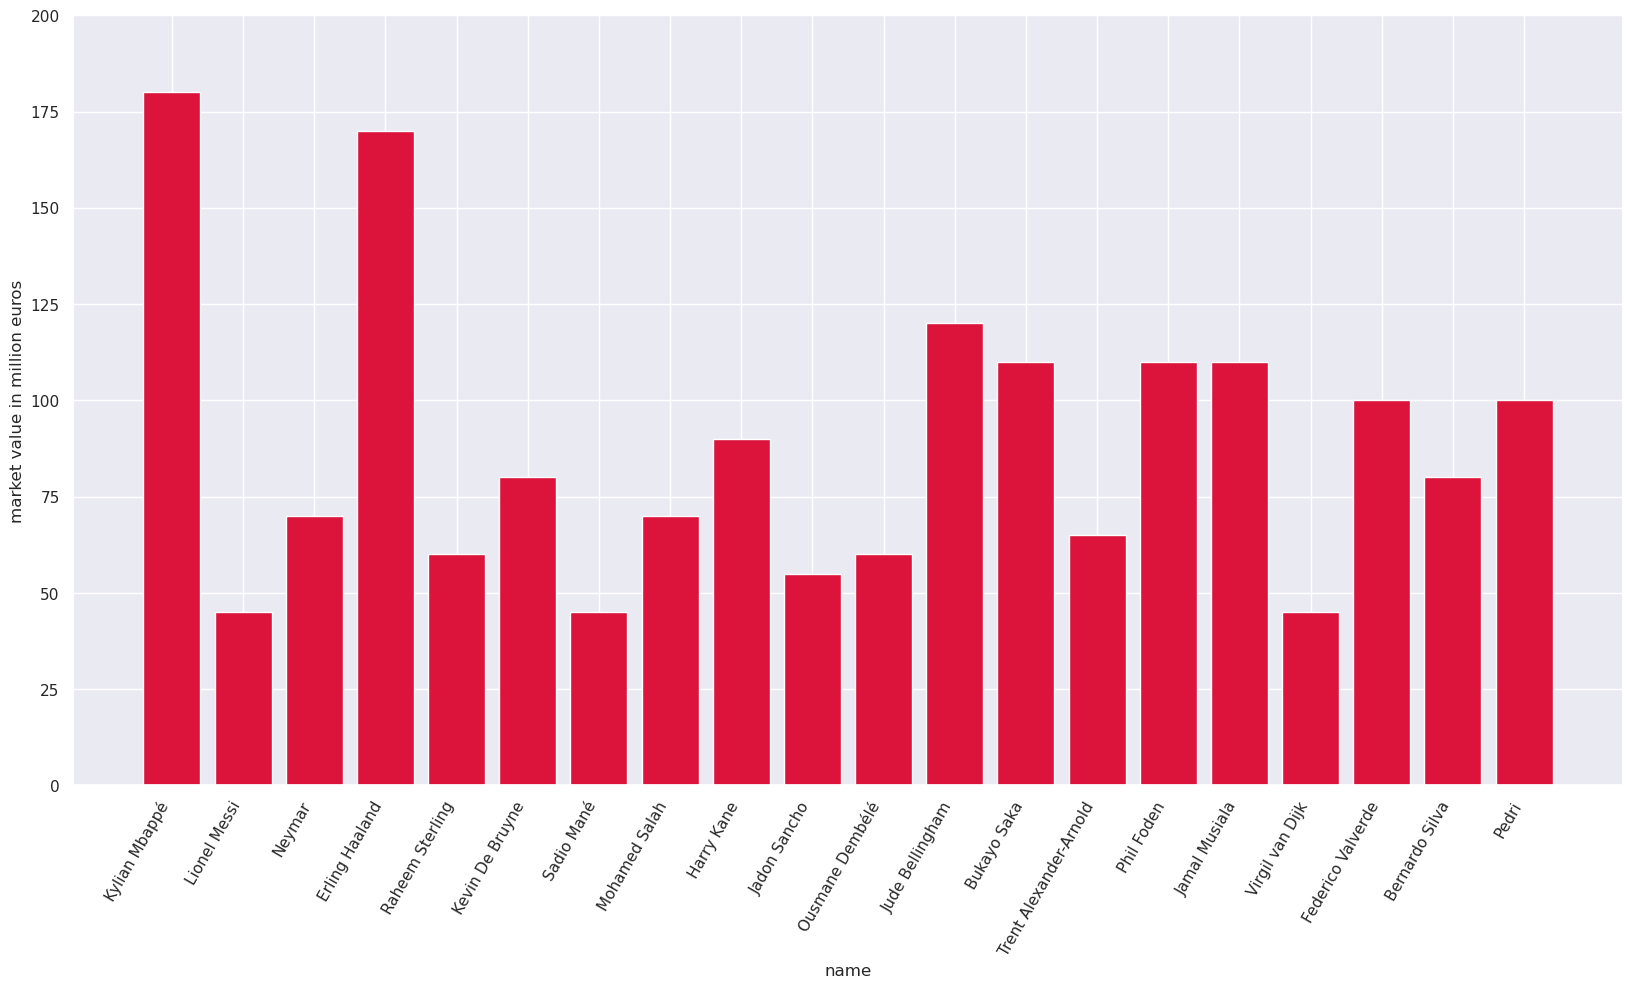

In [24]:
plt.bar(highest_value_players_df2['name'].head(20), (highest_value_players_df2['market_value_in_eur'].head(20))/1000000, color = 'crimson')
plt.ylim(0,200)
plt.xticks(rotation = 60, ha="right")
plt.xlabel('name')
plt.ylabel('market value in million euros')
plt.show()

**Statistical Overview**

In [25]:
# print info and describe for each dataframe

for i, df in enumerate(dataframes):
    print("***********")
    print(df.info())
    print(df.describe())

***********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28472 entries, 0 to 28471
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             28472 non-null  int64  
 1   first_name                            26620 non-null  object 
 2   last_name                             28472 non-null  object 
 3   name                                  28472 non-null  object 
 4   last_season                           28472 non-null  int64  
 5   current_club_id                       28472 non-null  int64  
 6   player_code                           28472 non-null  object 
 7   country_of_birth                      26677 non-null  object 
 8   city_of_birth                         26687 non-null  object 
 9   country_of_citizenship                28471 non-null  object 
 10  date_of_birth                         28430 non-null  object 
 11  sub

***COLLATING ALL PLAYER DATA***

Combining all the data of each player, so that we can build models

In [26]:
# Starting with players_df
(players_df.current_club_id[players_df.player_id == 4742])



21    2715
Name: current_club_id, dtype: int64

In [27]:
merged_players_df = players_df.drop(['current_club_id', 'city_of_birth', 'date_of_birth','first_name', 
                                     'last_name', 'player_code', 'image_url', 'url'], axis=1)

In [28]:
clubs_df.columns

Index(['club_id', 'club_code', 'name', 'domestic_competition_id', 'total_market_value', 'squad_size', 'average_age', 'foreigners_number', 'foreigners_percentage', 'national_team_players', 'stadium_name', 'stadium_seats', 'net_transfer_record', 'coach_name', 'last_season', 'url'], dtype='object')

In [29]:
merged_players_df = merged_players_df.reindex(columns = merged_players_df.columns.tolist()
                                              +['club_value','squad_size','goals','goals_2022','games_2022',
                                                'assists_2022','minutes_played_2022','goals_against_2022',
                                                'goals_for_2022','clean_sheet_2022'])

In [30]:
for player_id in merged_players_df.player_id.unique():
#     print(players_df.current_club_id[players_df.player_id == player_id])
    club_id = players_df.current_club_id[players_df.player_id == player_id]
#     print(clubs_df.squad_size[(clubs_df.club_id==int(club_id))])
#     print(clubs_df.total_market_value[(clubs_df.club_id==int(club_id))])
    try:
        merged_players_df.club_value[players_df.player_id==player_id] = int(clubs_df.total_market_value[(clubs_df.club_id==int(club_id))])
    except:
        merged_players_df.club_value[(players_df.player_id==player_id)]='NaN'  
        merged_players_df.squad_size[(players_df.player_id==player_id)]=int((clubs_df.squad_size[(clubs_df.club_id==int(club_id))]))



In [31]:
columns=['player_id','name','games_2022','minutes_played_2022','goals_2022','assists_2022','goals_against_2022','goals_for_2022','clean_sheet_2022','position','sub_position','last_season','foot','height_in_cm','age','country_of_citizenship','country_of_birth','current_club_name','club_value','squad_size','current_club_domestic_competition_id','agent_name','contract_expiration_date','term_days_remaining','market_value_in_eur','highest_market_value_in_eur']
merged_players_df=merged_players_df[columns]

#merge games and appearances
games_and_appearances_df = appearances_df.merge(games_df, on=['game_id'], how='left')
print('Player and club data merged')

Player and club data merged


In [32]:
#collate stats game, appearance and goal date for each player.


#merge games and appearances   
games_and_appearances_df = appearances_df.merge(games_df, on=['game_id'], how='left')
season = 2022 

#creating a function to combine player stats
def player_stats(player_id, season, df):
    df = games_and_appearances_df[games_and_appearances_df['player_id'] == player_id]
    df =  df[ df['season'] == season]    
    if (df.shape[0] == 0):
        Out = [(np.nan, season,0,0,0,0,0,0,0,0,0)]
        out_df = pd.DataFrame(data = Out, columns = ['player_id','season','goals','games',
                                                     'assists','minutes_played','goals_for','goals_against','clean_sheet','yellow_cards','red_cards'])
        return out_df    
    else:       
        df["goals_for"] = df.apply(lambda row: row['home_club_goals'] if row['home_club_id'] == row['player_club_id'] 
            else row['away_club_goals'] if row['away_club_id'] == row['player_club_id'] 
            else np.nan, axis=1)
        df["goals_against"] = df.apply(lambda row: row['away_club_goals'] if row['home_club_id'] == row['player_club_id'] 
            else row['home_club_goals'] if row['away_club_id'] == row['player_club_id'] 
            else np.nan, axis=1)
        df['clean_sheet'] = df.apply(lambda row: 1 if row['goals_against'] == 0
            else 0 if row['goals_against'] > 0
            else np.nan, axis=1)
        df = df.groupby(['player_id',"season"],as_index=False).agg({'goals': 'sum', 'game_id': 'nunique', 
                                                                      'assists': 'sum', 'minutes_played' : 'sum', 'goals_for' : 'sum',
                                                                      'goals_against' : 'sum', 'clean_sheet' : 'sum','yellow_cards':'sum','red_cards':'sum'})
        out_df = df.rename(columns={'game_id': 'games'})
        return out_df
# (player_stats(4742, 2022, games_and_appearances_df)) #test function works.



In [33]:
for index in merged_players_df.index:
    id = merged_players_df.loc[index][0]
    stats = player_stats(id, season, games_and_appearances_df)
    try:
        merged_players_df.at[index,'games_{}'.format(season)]= stats['games'][0] 
        merged_players_df.at[index,'goals_{}'.format(season)]= stats['goals'][0]
        merged_players_df.at[index,'assists_{}'.format(season)]= stats['assists'][0]
        merged_players_df.at[index,'minutes_played_{}'.format(season)]= stats['minutes_played'][0]
        merged_players_df.at[index,'goals_for_{}'.format(season)]= stats['goals_for'][0]
        merged_players_df.at[index,'goals_against_{}'.format(season)]= stats['goals_against'][0]
        merged_players_df.at[index,'clean_sheet_{}'.format(season)]= stats['clean_sheet'][0]
        merged_players_df.at[index,'yellow_cards_{}'.format(season)]= stats['yellow_cards'][0]
        merged_players_df.at[index,'red_cards_{}'.format(season)]= stats['red_cards'][0]
    except:
        print(id)
        n+=1
        

In [34]:
merged_players_df.head()

player_id                name  games_2022  minutes_played_2022  goals_2022  assists_2022  goals_against_2022  goals_for_2022  clean_sheet_2022  position        sub_position  last_season   foot  height_in_cm  age country_of_citizenship   country_of_birth       current_club_name club_value  squad_size current_club_domestic_competition_id       agent_name contract_expiration_date  term_days_remaining  market_value_in_eur  highest_market_value_in_eur  yellow_cards_2022  red_cards_2022
21       4742  Christophe Lepoint         9.0                728.0         0.0           0.0                17.0             7.0               0.0  Midfield    Central Midfield         2022  right         189.0   39                Belgium            Belgium             RFC Seraing        NaN        28.0                                  BE1      Eleven Plus               2023-06-30                   15              75000.0                    1700000.0                1.0             0.0
40       8187     Juanmi Callejón         0.0                  0.0         0.0           0.0                 0.0             0.0               0.0    Attack         Left Winger         2012  right         180.0   36                  Spain              Spain          APO Levadiakos        NaN        31.0                                  GR1              NaN               2023-06-30                   15             200000.0                    1000000.0                0.0             0.0
44       9604  Sherjill MacDonald         0.0                  0.0         0.0           0.0                 0.0             0.0               0.0    Attack      Centre-Forward         2014  right         183.0   39            Netherlands        Netherlands            KVC Westerlo        NaN        27.0                                  BE1              NaN               2023-06-30                   15                  NaN                    2000000.0                0.0             0.0
51      10471        Luiz Gustavo         0.0                  0.0         0.0           0.0                 0.0             0.0               0.0  Midfield  Defensive Midfield         2021   left         187.0   36                 Brazil             Brazil              Fenerbahce        NaN        28.0                                  TR1            ROGON               2023-06-30                   15            1000000.0                   22000000.0                0.0             0.0
85      18379       Damir Vrancic         0.0                  0.0         0.0           0.0                 0.0             0.0               0.0  Midfield    Central Midfield         2013   both         183.0   38                Germany  Jugoslawien (SFR)  Eintracht Braunschweig        NaN        29.0                                   L1  PRO Profil GmbH               2023-06-30                   15                  NaN                    1000000.0                0.0             0.0

In [35]:
print('appearance,goal and card data merged')
merged_players_df[merged_players_df.name=="Sherjill MacDonald"]

appearance,goal and card data merged


player_id                name  games_2022  minutes_played_2022  goals_2022  assists_2022  goals_against_2022  goals_for_2022  clean_sheet_2022 position    sub_position  last_season   foot  height_in_cm  age country_of_citizenship country_of_birth current_club_name club_value  squad_size current_club_domestic_competition_id agent_name contract_expiration_date  term_days_remaining  market_value_in_eur  highest_market_value_in_eur  yellow_cards_2022  red_cards_2022
44       9604  Sherjill MacDonald         0.0                  0.0         0.0           0.0                 0.0             0.0               0.0   Attack  Centre-Forward         2014  right         183.0   39            Netherlands      Netherlands      KVC Westerlo        NaN        27.0                                  BE1        NaN               2023-06-30                   15                  NaN                    2000000.0                0.0             0.0

In [36]:
(merged_players_df.info())
(merged_players_df.describe().T)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17955 entries, 21 to 28471
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   player_id                             17955 non-null  int64         
 1   name                                  17955 non-null  object        
 2   games_2022                            17955 non-null  float64       
 3   minutes_played_2022                   17955 non-null  float64       
 4   goals_2022                            17955 non-null  float64       
 5   assists_2022                          17955 non-null  float64       
 6   goals_against_2022                    17955 non-null  float64       
 7   goals_for_2022                        17955 non-null  float64       
 8   clean_sheet_2022                      17955 non-null  float64       
 9   position                              17955 non-null  object        
 1

count          mean           std      min       25%       50%        75%          max
player_id                    17955.0  3.432352e+05  2.218224e+05    215.0  164699.0  311438.0   495628.0    1134218.0
games_2022                   17955.0  3.611083e+00  6.385072e+00      0.0       0.0       0.0        5.0         29.0
minutes_played_2022          17955.0  2.364459e+02  4.577038e+02      0.0       0.0       0.0      197.5       2533.0
goals_2022                   17955.0  3.475355e-01  1.254276e+00      0.0       0.0       0.0        0.0         27.0
assists_2022                 17955.0  2.732387e-01  9.281738e-01      0.0       0.0       0.0        0.0         17.0
goals_against_2022           17955.0  5.071512e+00  9.300260e+00      0.0       0.0       0.0        7.0         51.0
goals_for_2022               17955.0  5.534447e+00  1.090484e+01      0.0       0.0       0.0        7.0         80.0
clean_sheet_2022             17955.0  1.004066e+00  2.125644e+00      0.0       0.0       0.0        1.0         14.0
last_season                  17955.0  2.019601e+03  2.801494e+00   2012.0    2018.0    2021.0     2022.0       2022.0
height_in_cm                 17214.0  1.822672e+02  7.004736e+00     18.0     178.0     183.0      187.0        207.0
age                          17955.0  2.728800e+01  4.842201e+00     16.0      23.0      27.0       31.0         45.0
squad_size                   17955.0  2.659332e+01  6.125531e+00      0.0      25.0      27.0       30.0         41.0
term_days_remaining          17955.0  3.541844e+02  4.148619e+02   -165.0      15.0     199.0      565.0       3303.0
market_value_in_eur          15759.0  2.504002e+06  7.502406e+06  10000.0  200000.0  400000.0  1500000.0  180000000.0
highest_market_value_in_eur  17527.0  4.264655e+06  1.082552e+07  10000.0  300000.0  800000.0  3000000.0  200000000.0
yellow_cards_2022            17955.0  5.194653e-01  1.242645e+00      0.0       0.0       0.0        0.0         13.0
red_cards_2022               17955.0  1.542746e-02  1.268127e-01      0.0       0.0       0.0        0.0          2.0

In [37]:
z = merged_players_df.loc[:, ["name", "goals_2022","minutes_played_2022", "games_2022", "goals_against_2022", "goals_for_2022"]].groupby("name", as_index = False).sum().sort_values(by="goals_2022", ascending= False)
z.name[z.games_2022 == 5.0].count()


157

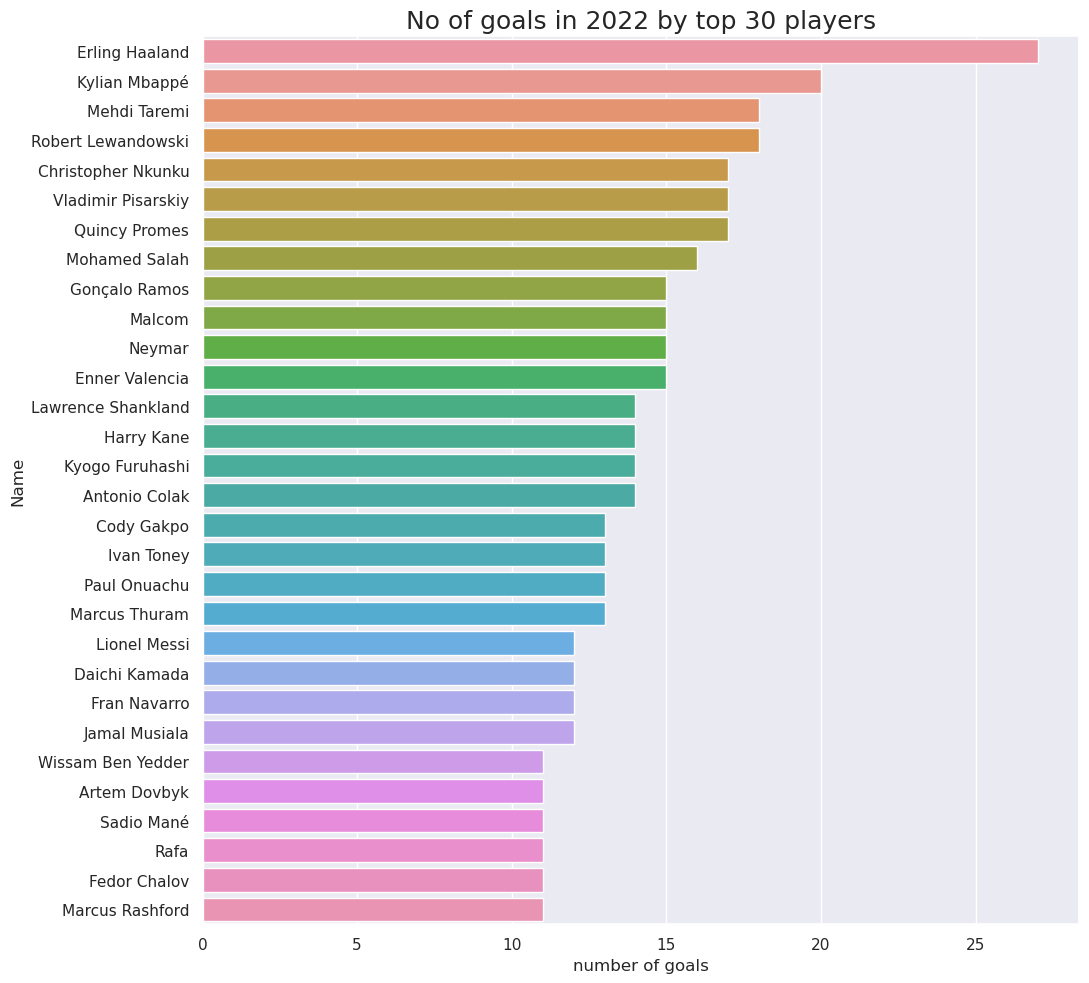

In [38]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.barplot(x= "goals_2022", y= "name", data= z.head(30), orient = 'h')
plt.title("No of goals in 2022 by top 30 players", fontsize =18 )
# plt.xticks(rotation = 90 )
plt.ylabel("Name")
plt.xlabel("number of goals")
plt.tight_layout()
plt.show()

**Pairplot**

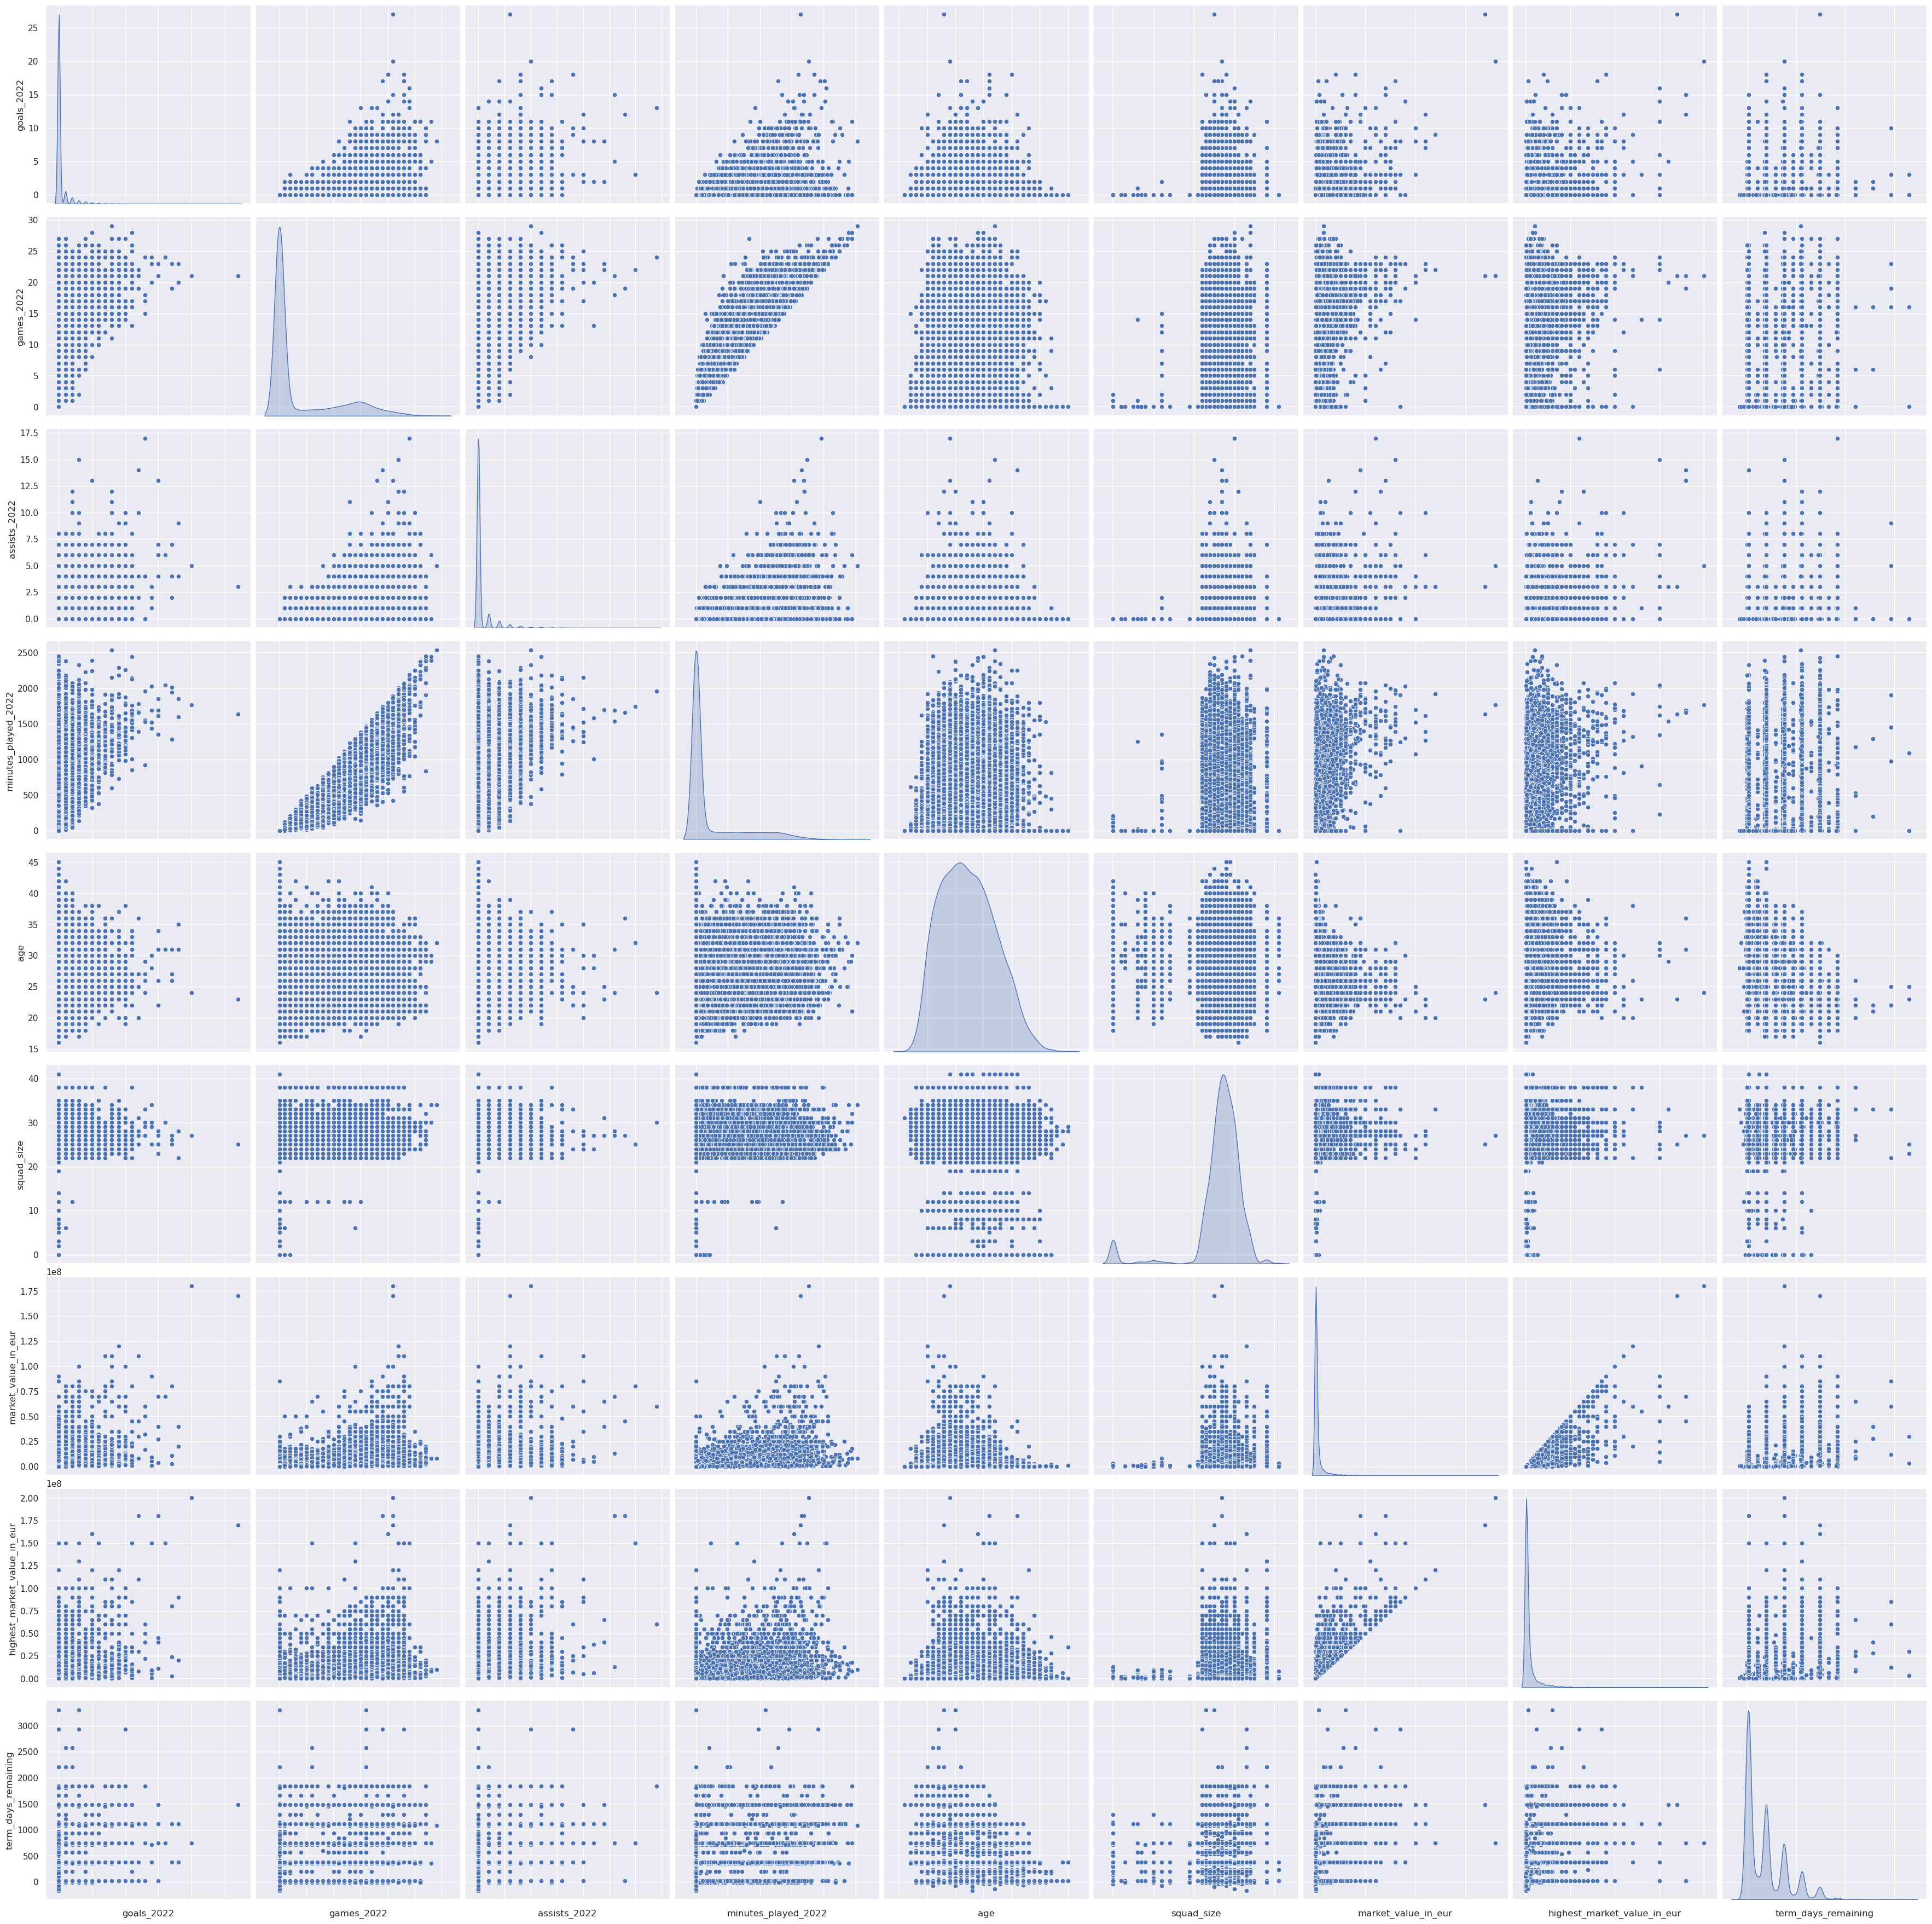

In [39]:
g = sns.pairplot(merged_players_df[[u'goals_2022', u'games_2022',
                                    u'assists_2022', u'minutes_played_2022',u'age',
                                    u'squad_size',u'market_value_in_eur',u'highest_market_value_in_eur',
                                    u'term_days_remaining']], palette = 'flare',size=4,diag_kind = 'kde' )
g.set(xticklabels=[])

Index(['games_2022', 'minutes_played_2022', 'goals_2022', 'assists_2022', 'goals_against_2022', 'goals_for_2022', 'clean_sheet_2022', 'age', 'squad_size', 'term_days_remaining', 'market_value_in_eur', 'highest_market_value_in_eur', 'yellow_cards_2022', 'red_cards_2022'], dtype='object')


<Axes: title={'center': 'Correlation of Features'}>

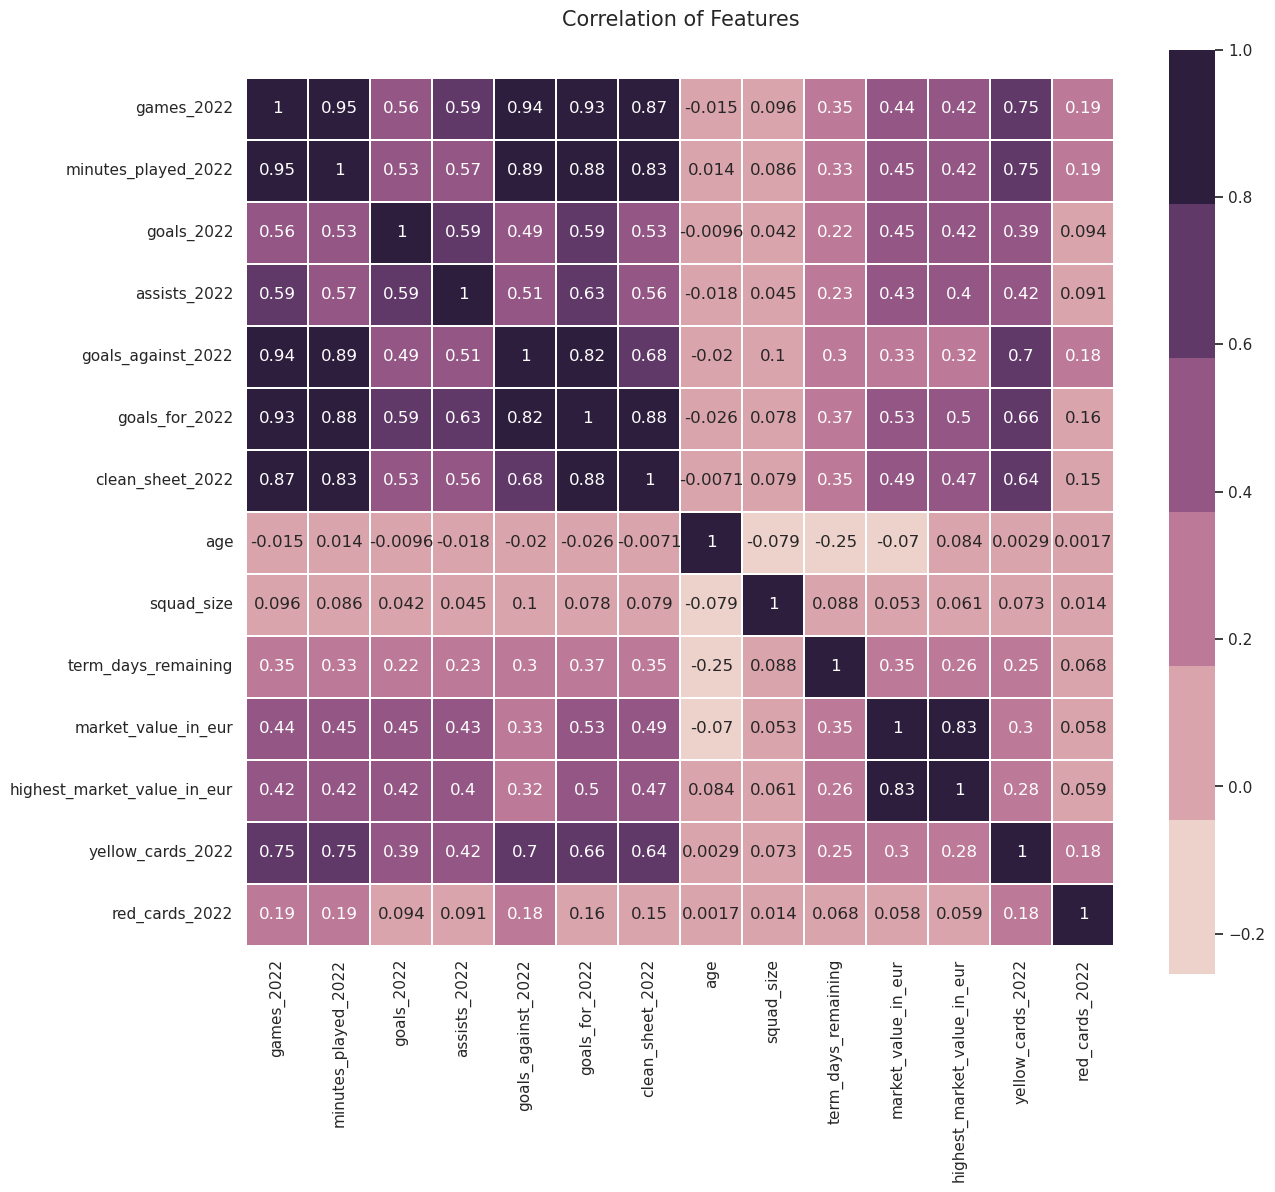

In [40]:
colormap = sns.cubehelix_palette()
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1.05, size=15)
features_df=merged_players_df.drop(['player_id','name','position','sub_position','last_season','foot','height_in_cm','club_value' , 'country_of_citizenship','country_of_birth','current_club_name','current_club_domestic_competition_id','agent_name','contract_expiration_date'],axis=1)
print(features_df.columns)
sns.heatmap(features_df.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True, cmap=colormap, linecolor='white', annot=True)

**GENERATING MODELS**

In [94]:
#Seperating numeric columns

NUMERIC_COLUMNS=['goals_2022','goals_against_2022','goals_for_2022',
                 'games_2022','assists_2022','minutes_played_2022',
                 'age','squad_size']

OTHER_COLUMNS=['position','sub_position','last_season','foot','height_in_cm',
               'country_of_citizenship','country_of_birth','current_club_name',
               'current_club_domestic_competition_id', 'agent_name',
               'contract_expiration_date']

#dropping nan

merged_players_df=merged_players_df.dropna(subset=['market_value_in_eur'])

# Creating test, train data and splitting them.

X = merged_players_df[NUMERIC_COLUMNS]
y= merged_players_df['market_value_in_eur']



In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score



In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=21)

In [96]:
clf = SVR(kernel= 'linear')
clf.fit(X_train, y_train)


final_y_prediction = clf.predict(X_test)
print(f"Accuracy : {clf.score(X_test, y_test)}")

# Submission = clf.predict(test)
# Submission
# final_y_prediction

Accuracy : 0.0838820447316867


Some feature engineering is to be needed in order to make results better

INITIAL FEATURE ENGINEERING

In [97]:
merged_players_df1 = merged_players_df[(merged_players_df.current_club_domestic_competition_id=='GB1')]
# convert position categories to Columns for test data
dummies=pd.get_dummies(merged_players_df1[['position']], prefix_sep='_') #position
merged_players_df1 = pd.concat([merged_players_df1, dummies], axis=1) 
print('initial feature engineering complete')
(merged_players_df1.shape)

initial feature engineering complete


(1279, 32)

**RE-EVALUATING MODEL**

In [98]:
#separate numeric columns
NUMERIC_COLUMNS=['goals_2022','goals_against_2022', 'goals_for_2022','games_2022','assists_2022','minutes_played_2022','age','squad_size','term_days_remaining','position_Attack','position_Defender','position_Goalkeeper','position_Midfield']
OTHER_COLUMNS=['sub_position','last_season','foot','height_in_cm','country_of_citizenship','country_of_birth','current_club_name','current_club_domestic_competition_id','agent_name','contract_expiration_date']

# create test and training data
y=merged_players_df1['market_value_in_eur']
X = merged_players_df1[NUMERIC_COLUMNS].fillna(-1000)
#split test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=21)
#model data
gbr = GradientBoostingRegressor(random_state=0)
#clf = SVR(kernel="linear",gamma="auto")
#clf = DecisionTreeRegressor(random_state=0)
gbr.fit(X_train, y_train)
#assess accurancy of model
print("Accuracy: {}".format(gbr.score(X_test, y_test)))


Accuracy: 0.7431183582754446


Filtering out domestic competition to GB1 and converting position data to categorical data the accuracy increased by 0.29

Further Feature Engineering

In [99]:
# convert position categories to Columns for test data
dummies=pd.get_dummies(merged_players_df1[['sub_position']], prefix_sep='_') #sub position
merged_players_df1 = pd.concat([merged_players_df1, dummies], axis=1) 
dummies1=pd.get_dummies(merged_players_df1[['foot']], prefix_sep='_') #foot
merged_players_df1 = pd.concat([merged_players_df1, dummies1], axis=1) 
(merged_players_df1.shape)
# merged_players_df.head()

(1279, 48)

In [148]:
#separate numeric columns
NUMERIC_COLUMNS=['goals_2022','goals_against_2022', 'goals_for_2022','games_2022',
                 'assists_2022','minutes_played_2022','age','height_in_cm','squad_size',
                 'term_days_remaining','position_Attack','position_Defender','position_Goalkeeper',
                 'position_Midfield','sub_position_Attacking Midfield','sub_position_Central Midfield',
                 'sub_position_Centre-Back','sub_position_Centre-Forward','sub_position_Defensive Midfield',
                 'sub_position_Left Midfield','sub_position_Left Winger','sub_position_Left-Back','sub_position_Right Midfield',
                 'sub_position_Right Winger','sub_position_Right-Back',
                 'sub_position_Second Striker','foot_left','foot_right','foot_both']


OTHER_COLUMNS=['last_season','country_of_citizenship','country_of_birth','current_club_name',
               'current_club_domestic_competition_id','agent_name','contract_expiration_date'] 


# create test and training data
X = merged_players_df1[NUMERIC_COLUMNS].fillna(-1000)
y=merged_players_df1['market_value_in_eur']
#split test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=21)

comparision_df = pd.DataFrame(columns = ['model', 'accuracy'])

# models

gbr = GradientBoostingRegressor(random_state=0)
svr = SVR(kernel = 'linear', gamma = 'auto')
dtr =DecisionTreeRegressor(random_state = 0)
rfr = RandomForestRegressor(random_state = 1)
XGBR = ensemble.GradientBoostingRegressor(n_estimators = 1000, learning_rate = 0.04, random_state = 1)
cat = CatBoostRegressor(iterations = 10, learning_rate = 1, depth = 3)
lgbm = LGBMRegressor()

models=[gbr,svr,dtr,XGBR,rfr,cat,lgbm]
for model in models:
    model.fit(X_train, y_train)
#     comparisions_df = pd.DataFrame(model, model.score(X_test, y_test), columns= ['model', 'accuracy'] )
    comparision_df.loc[len(comparision_df)] = [model.__class__.__name__, model.score(X_test, y_test)]
    



0:	learn: 9391885.2668005	total: 1.67ms	remaining: 15ms
1:	learn: 8558851.6564849	total: 2.67ms	remaining: 10.7ms
2:	learn: 8392794.7609059	total: 3.31ms	remaining: 7.73ms
3:	learn: 7663801.3006299	total: 3.84ms	remaining: 5.76ms
4:	learn: 7409081.1273092	total: 4.43ms	remaining: 4.43ms
5:	learn: 6945184.7289066	total: 4.94ms	remaining: 3.29ms
6:	learn: 6807984.5895323	total: 5.42ms	remaining: 2.32ms
7:	learn: 6547433.7331920	total: 5.97ms	remaining: 1.49ms
8:	learn: 6482639.0777308	total: 6.38ms	remaining: 708us
9:	learn: 6226516.9201307	total: 6.83ms	remaining: 0us


In [149]:
# models=[gbr,svr,dtr,XGBR,rfr,cat,lgbm]
# data = []
# for model in models:
#     model.fit(X_train, y_train)
#     data.append([model.__class__.__name__, model.score(X_test, y_test)])
#     comparisions_df = pd.DataFrame(data, columns= ['model', 'accuracy'] )
# comparisions_df

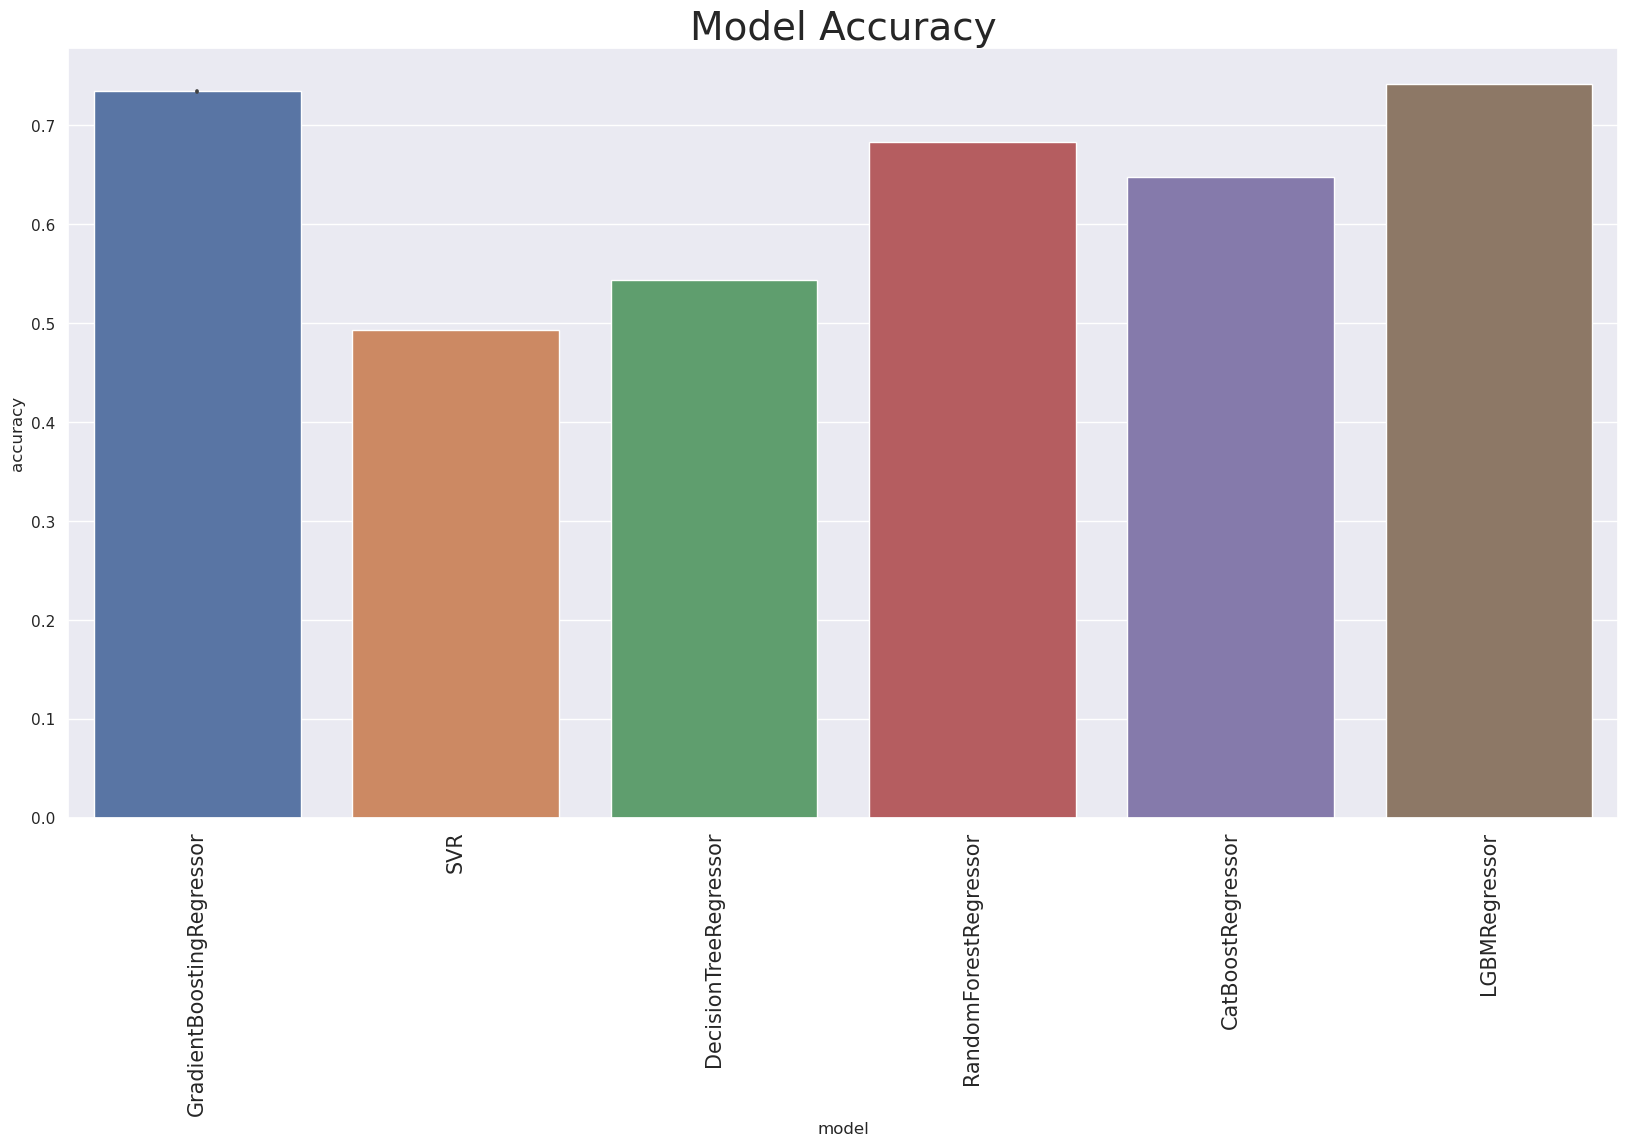

In [150]:
plt.figure(figsize = (20,10))
sns.barplot(data= comparision_df, x='model', y='accuracy')
plt.title("Model Accuracy", fontsize = 28)
plt.xticks(rotation = 90, fontsize = 15)
# plt.xlabel(f'{comparision_df.model}', fontsize = 20)
plt.show()

In [125]:
(comparision_df)

model  accuracy
0  GradientBoostingRegressor  0.733796
1                        SVR  0.493315
2      DecisionTreeRegressor  0.543473
3  GradientBoostingRegressor  0.735324
4      RandomForestRegressor  0.682882
5          CatBoostRegressor  0.647923
6              LGBMRegressor  0.741625